In [1]:
%matplotlib inline
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
#from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.layers import Dense, GlobalAveragePooling2D, GlobalMaxPooling2D,MaxPooling2D
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Input

from glob import glob
from itertools import cycle,zip_longest

import PIL
from PIL import Image
import matplotlib.pyplot as plt
import json
import time

from sklearn.cluster import KMeans

import numpy as np
import lda
import collections

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import matplotlib

/home/ubuntu/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import tensorflow as tf

## Data Processing - Create Batch Generator

In [2]:
path = "./"
image_size=(224,224)
img_height = 224
img_width = 224
total_image_num = 50
#total_image_num = 50
batch_size = 10

In [3]:
def grouper(n, iterable, fillvalue=None):
  args = [iter(iterable)]*n
  return zip_longest(*args, fillvalue=fillvalue)

In [4]:
def get_images(batch_size=10):
  height = img_height
  width = img_width
  #data_dir = "/Users/sashatn/Desktop/Cambridge/Michaelmas/Probabilistic Machine Learning (LE48)/Project/test/"
  data_dir = "/home/ubuntu/project/le49/photos/"
  input_files = glob(data_dir + "*.jpg")
  #print(input_files)
  input_files_infinite = cycle(input_files)
  input_files_grouped = grouper(batch_size,input_files_infinite)
  while 1:
    
    image_names = next(input_files_grouped)
    img = [image.load_img(fname, target_size=(224, 224)) for fname in image_names]
    img_array = [image.img_to_array(image_val) for image_val in img]
    img_array_expand = [np.expand_dims(image, axis=0) for image in img_array]
    image_files = [preprocess_input(image) for image in img_array_expand]
    
    yield zip(np.array(image_files),list(image_names))

In [160]:
generator = get_images(20)

In [161]:
imgs,names = map(list, zip(*next(generator))) 

In [162]:
for name in names:
    print(name)

/home/ubuntu/project/le49/photos/qpekRdR0XNFwMgLO9nzIEA.jpg
/home/ubuntu/project/le49/photos/NFZeHEIBg96jVH-OnxQovg.jpg
/home/ubuntu/project/le49/photos/lv2jMT7u9SfJJ0MqDgfMFw.jpg
/home/ubuntu/project/le49/photos/HsImvej9DZ0wS9peeZvt5Q.jpg
/home/ubuntu/project/le49/photos/XhYZsuCb8ALJmSfXSyaQbQ.jpg
/home/ubuntu/project/le49/photos/mIEZdMEhZxWqn4n9fM45NQ.jpg
/home/ubuntu/project/le49/photos/Hms3iIOXL9g-RPem44QrKg.jpg
/home/ubuntu/project/le49/photos/s-k8iX0kjKmKQ1_IxJ2Myg.jpg
/home/ubuntu/project/le49/photos/PCqVWuMdRxH4zwpc2rI22g.jpg
/home/ubuntu/project/le49/photos/jJKCAzYniBPe-LKH5P-KaA.jpg
/home/ubuntu/project/le49/photos/X0mmnTLIkRic-zLjXAStgg.jpg
/home/ubuntu/project/le49/photos/VcgMNd_cwwbMRw_lV9sB1Q.jpg
/home/ubuntu/project/le49/photos/LjNLtok_6_rba6MTLubBgA.jpg
/home/ubuntu/project/le49/photos/hLquFd0wWcr6meaW2e4WEQ.jpg
/home/ubuntu/project/le49/photos/yF6XfggC7yYIb11VQ80Umw.jpg
/home/ubuntu/project/le49/photos/lSCiOfv4Mzx3Lin8nSKiTQ.jpg
/home/ubuntu/project/le49/photos/zADOWSL

In [257]:
#all_images = []
all_names = [] 
all_predictions = []
num_batches = int(total_image_num/batch_size)
#start_time = time.time()
for i in range(num_batches):
    imgs,names = map(list, zip(*next(generator))) 
    imgs = np.squeeze(imgs,axis=1)
    print("Processed batch: %s" % (i))
    all_predictions.append(comb_model_pool.predict(imgs))
    print("Predicted batch: %s" % (i))
    all_names.append(names)
#end_time = time.time()
#time_per_batch = end_time - start_time
#print(time_per_batch)
print("Started Conversion To Array")
all_predictions = np.asarray(all_predictions)
all_names = np.asarray(all_names)

Processed batch: 0
Predicted batch: 0
Started Conversion To Array


In [258]:
all_predictions.shape

(1, 10, 7, 7, 512)

In [ ]:
(((206949/batch_size)*time_per_batch)/60)/60

In [ ]:
test = np.random.randint(5,size=(206669,512))

In [ ]:
np.save('test_ex.npy', test) 

In [ ]:
val = np.load('test_ex.npy')

In [ ]:
val.shape

In [ ]:
all_images = np.reshape(all_images,(num_batches*batch_size,224,224,3))
all_names = np.reshape(all_names,(num_batches*batch_size,224,224,3))

In [ ]:
all_predictions = np.reshape(all_predictions,(num_batches*batch_size,512))
all_names = np.reshape(all_names,(num_batches*batch_size))

In [ ]:
all_images.shape

In [ ]:
206949*224*224*3 - 206949*512

In [ ]:
206949*512

In [ ]:
#imgs,names = next(generator)
imgs,names = map(list, zip(*next(generator)))

In [ ]:
imgs = np.squeeze(imgs,axis=1)

In [ ]:
imgs.shape

In [ ]:
#plt.imshow(Image.open(names[0])) # food
#plt.imshow(Image.open(names[1])) # food
#plt.imshow(Image.open(names[2])) # rest 
#plt.imshow(Image.open(names[3])) # food 
#plt.imshow(Image.open(names[4])) # rest?

In [ ]:
np.save('test3.npy', imgs)    # .npy extension is added if not given
d = np.load('test3.npy')
imgs == d

## Process .json file with image labels 

In [2]:
def process_label_file():
    #with open("photos.json") as infile:
    with open("../photos.json") as infile:
      val = infile.readlines()

    id = []
    label = []
    for i in val:
      #print(i)
      #print("ID: %s, Label: %s" % (json.loads(i)['photo_id'],json.loads(i)['label']))
      id.append(json.loads(i)['photo_id'])
      label.append(json.loads(i)['label'])
    id = np.asarray(id)
    label = np.asarray(label)
    info = np.vstack((id,label))
    info = info.T
    info[0,:]
    return info

In [3]:
info = process_label_file()

In [4]:
used_im_labels = np.load('labels.npy')

In [5]:
#number of clusters
uniq_elem = np.unique(info[:,1])

In [201]:
#align images with labels in used_im_labels array
#process_names = names
#new_names = [(name.replace("/home/ubuntu/project/le49/photos/","")).replace(".jpg","") for name in process_names]
#used_im_labels = [info[np.where(info[:,0]==name)[0][0],1] for name in new_names]
#used_im_labels = np.asarray(used_im_labels)

In [204]:
#np.save('labels.npy', used_im_labels) 

## Define Model

In [2]:
input_tensor = Input(shape=(224, 224, 3))

In [3]:
# instal h5py
base_model = VGG19(input_tensor=input_tensor,weights='imagenet',include_top=False)

In [4]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv4').output)

In [5]:
vgg_output = model(input_tensor)

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

** Add Global Pooling to VGG19 to simply 7x7 Conv Filters to single values  **

In [246]:
shape = (14,14,512)

In [14]:
global_pooling = GlobalAveragePooling2D(input_shape=shape)(vgg_output)

In [255]:
max_pooling = MaxPooling2D(input_shape=shape)(vgg_output)

In [15]:
comb_model_global = Model(inputs=input_tensor, outputs=global_pooling)

In [256]:
comb_model_pool = Model(inputs=input_tensor, outputs=max_pooling)

In [16]:
out_global = comb_model_global.predict(imgs)

NameError: name 'imgs' is not defined

In [ ]:
out_max = comb_model_pool.predict(imgs)

In [ ]:
out.shape

## Load extracted features

In [6]:
#refer to extract_files.py for creation of these files
final_features = np.load('predictions.npy')
names = np.load('names.npy')

In [95]:
final_features_1 = np.load('predictions_block2_global.npy')

In [7]:
final_features_2 = np.load('predictions_block5_global.npy')

In [2]:
final_features_3 = np.load('predictions_block2_max.npy')

In [141]:
final_features_4 = np.load('predictions_block5_max.npy')

In [168]:
(names == names2).any()

True

In [142]:
final_features_4.shape

(206900, 512)

In [192]:
final_features

array([[ 5.494965  ,  0.4184692 , 11.300684  , ...,  0.4495229 ,
         1.9240208 ,  4.7114367 ],
       [ 0.6413009 ,  0.8017718 ,  0.        , ...,  3.1617298 ,
         4.3185253 ,  0.6618246 ],
       [ 0.        ,  2.8512075 ,  0.6479248 , ...,  5.627703  ,
         1.5057893 ,  1.1941388 ],
       ...,
       [ 1.1732162 ,  1.5494883 ,  0.7602173 , ...,  0.        ,
         5.578234  ,  1.3462251 ],
       [ 0.        ,  0.17047195,  0.        , ...,  0.        ,
         5.813669  , 19.557812  ],
       [ 2.483634  ,  0.07345176, 61.93138   , ..., 48.941437  ,
         2.875477  ,  3.0639713 ]], dtype=float32)

## Process features into word representations

** Attempting to kmeans cluster features **

In [177]:
vocab_size = 512

In [178]:
final_features_subset = final_subset

In [179]:
all_features = np.reshape(np.reshape(final_features,(final_features.shape[0]*512)),(-1,1))

In [180]:
kmeans = KMeans(n_clusters=vocab_size, random_state=0).fit(all_features)

KeyboardInterrupt: 

In [ ]:
clusters = np.reshape(kmeans.labels_,(total_image_num,vocab_size))

In [ ]:
clusters.shape

In [ ]:
bof = []
vocab = np.arange(vocab_size)
for row in range(clusters.shape[0]):
  count = []
  for i in vocab:
    count.append((clusters[row,:]==i).sum())
  bof.append(np.asarray(count))
bof = np.asarray(bof)

In [ ]:
vocab = np.arange(vocab_size)
count = [(clusters[row,:]==i).sum() for i in vocab]
bof = [np.asarray(count) for row in range(clusters.shape[0])]
bof = np.asarray(bof)

In [ ]:
bof.shape

In [ ]:
processed_features = bof

** Process by normalising the rows and setting values > 0.5 to 1 otherwise 0 **

In [92]:
def process_features(final_features):
    processed_features_list = []
    mean = np.mean(final_features,axis=1)
    min = np.min(final_features,axis=1)
    max = np.max(final_features,axis=1)
    for row in range(final_features.shape[0]):
      if((100*row/final_features.shape[0]) % 10 == 0 and int(100*row/final_features.shape[0]) !=0):
          print("%s" % (int(100*row/final_features.shape[0])))
      normalised_row = [(image-min[row])/(max[row]-min[row]) for image in final_features[row,:]]
      discrete_row = [1 if image >= 0.5 else 0 for image in normalised_row]
      final_array_row = np.asarray(discrete_row)
      processed_features_list.append(final_array_row)
    return np.asarray(processed_features_list)

(array([8.2560349e+07, 1.1505250e+07, 4.9788250e+06, 2.5730420e+06,
        1.4446650e+06, 8.8173800e+05, 5.6543500e+05, 3.7741500e+05,
        2.6470100e+05, 1.9108300e+05, 1.3474600e+05, 1.0210900e+05,
        7.6368000e+04, 5.8167000e+04, 4.5639000e+04, 3.4293000e+04,
        2.7345000e+04, 2.2279000e+04, 1.6955000e+04, 1.3090000e+04,
        1.1058000e+04, 8.7860000e+03, 7.1440000e+03, 5.9490000e+03,
        4.5640000e+03, 4.0180000e+03, 3.3140000e+03, 2.4300000e+03,
        2.2360000e+03, 1.5930000e+03, 1.2920000e+03, 1.3050000e+03,
        7.8200000e+02, 7.8600000e+02, 5.7200000e+02, 4.9800000e+02,
        4.2600000e+02, 2.9300000e+02, 3.1700000e+02, 3.0800000e+02,
        2.3200000e+02, 2.0400000e+02, 1.5200000e+02, 1.4100000e+02,
        1.1300000e+02, 1.0900000e+02, 9.8000000e+01, 7.9000000e+01,
        5.2000000e+01, 5.0000000e+01, 5.3000000e+01, 3.6000000e+01,
        4.3000000e+01, 2.5000000e+01, 2.9000000e+01, 2.4000000e+01,
        3.7000000e+01, 2.1000000e+01, 1.6000000e

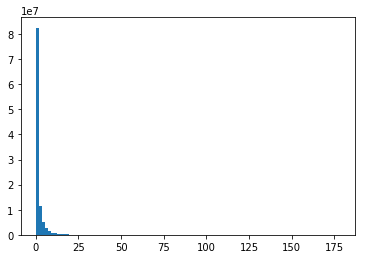

In [18]:
plt.hist(np.reshape(final_features_2,(206900*512)),bins=100)

(array([7.9287733e+07, 1.4501387e+07, 5.5313160e+06, 2.6568540e+06,
        8.0784700e+05, 1.0763660e+06, 6.5014500e+05, 4.1365300e+05,
        2.7946700e+05, 1.0643100e+05, 1.5764000e+05, 1.1452500e+05,
        8.3099000e+04, 3.3607000e+04, 5.3457000e+04, 3.9415000e+04,
        3.0458000e+04, 2.4172000e+04, 9.4750000e+03, 1.5212000e+04,
        1.2425000e+04, 9.6290000e+03, 3.9810000e+03, 6.8780000e+03,
        5.5710000e+03, 4.5800000e+03, 3.4880000e+03, 1.3050000e+03,
        2.5910000e+03, 1.8530000e+03, 1.4180000e+03, 8.4100000e+02,
        9.9400000e+02, 8.8000000e+02, 6.4900000e+02, 5.6600000e+02,
        2.2700000e+02, 3.6600000e+02, 3.4600000e+02, 3.3200000e+02,
        1.6100000e+02, 2.2400000e+02, 1.7000000e+02, 1.5800000e+02,
        1.3400000e+02, 5.7000000e+01, 1.0600000e+02, 1.0000000e+02,
        6.1000000e+01, 2.6000000e+01, 5.1000000e+01, 5.2000000e+01,
        4.6000000e+01, 2.9000000e+01, 2.0000000e+01, 2.5000000e+01,
        3.2000000e+01, 3.2000000e+01, 1.6000000e

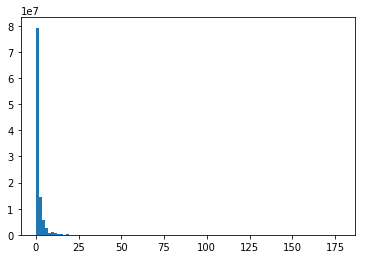

In [19]:
plt.hist(np.round(np.reshape(final_features_2,(206900*512))),bins=100)

In [8]:
processed_features = np.reshape(np.round(np.reshape(final_features_2,(206900*512))),(206900,512)).astype(int)

In [97]:
processed_features = np.reshape(np.round(np.reshape(final_features_1,(206900*128))),(206900,128)).astype(int)

In [9]:
processed_features

array([[ 3,  0,  7, ...,  0,  1,  3],
       [ 0,  0,  0, ...,  1,  2,  0],
       [ 0,  1,  0, ...,  2,  1,  1],
       ...,
       [ 1,  1,  0, ...,  0,  3,  1],
       [ 0,  0,  0, ...,  0,  2, 10],
       [ 1,  0, 43, ..., 33,  1,  1]])

In [11]:
final_features_2.shape

(206900, 512)

In [174]:
processed_features = process_features(final_features_2)

10
20
30
40
50
60
70
80
90


In [ ]:
processed_features = process_features(final_features)

In [32]:
#np.save('processed_features.npy', processed_features) 

In [7]:
processed_features = np.load('processed_features.npy')

In [10]:
def generate_data_samples(samples_per_category):
    subset_samples = []
    subset_labels = []
    random_subset_vals = []
    names_subset = []
    for i in range(uniq_elem.shape[0]):
        new_sample = processed_features[used_im_labels == uniq_elem[i]]
        random_subset = np.random.choice(range(0,new_sample.shape[0]), size=(samples_per_category), replace=False)
        subset_samples.append(new_sample[random_subset])
        subset_labels.append([uniq_elem[i]]*samples_per_category)
        names_subset.append(names[random_subset])
        random_subset_vals.append(random_subset)
    subset_samples = np.asarray(subset_samples)
    subset_labels = np.asarray(subset_labels)
    random_subset_vals = np.asarray(random_subset_vals)
    names_subset = np.asarray(names_subset)
    print(subset_labels.shape)
    final_subset = np.reshape(subset_samples,(uniq_elem.shape[0]*samples_per_category,512))
    final_labels = np.reshape(subset_labels,(uniq_elem.shape[0]*samples_per_category))
    final_names = np.reshape(names_subset,(uniq_elem.shape[0]*samples_per_category))
    return final_subset, final_labels, random_subset_vals,final_names


In [9]:
def regenerate_random_data_samples(total_samples,random_subset):
    subset_samples = []
    subset_labels = []
    random_subset_vals = []
    names_subset = []
    final_subset = processed_features[random_subset][0,:,:]
    final_labels = used_im_labels[random_subset][0]
    final_names = names[random_subset][0]
    random_subset_vals.append(random_subset)
    return final_subset, final_labels, random_subset_vals,final_names


In [9]:
def generate_random_data_samples(total_samples):
    subset_samples = []
    subset_labels = []
    random_subset_vals = []
    names_subset = []
    random_subset = np.random.choice(range(0,processed_features.shape[0]), size=(total_samples), replace=False)
    final_subset = processed_features[random_subset]
    final_labels = used_im_labels[random_subset]
    final_names = names[random_subset]
    random_subset_vals.append(random_subset)
    return final_subset, final_labels, random_subset_vals,final_names



In [47]:
processed_features[random_subset][0,:,:].shape

(2000, 512)

In [10]:
def regenerate_data_samples(random_subset,samples_per_category):
    subset_samples = []
    subset_labels = []
    names_subset = []
    for i in range(uniq_elem.shape[0]):
        new_sample = processed_features[used_im_labels == uniq_elem[i]]
        #random_subset = np.random.choice(range(0,new_sample.shape[0]), size=(samples_per_category), replace=False)
        subset_samples.append(new_sample[random_subset[i]])
        subset_labels.append([uniq_elem[i]]*samples_per_category)
        names_subset.append(names[random_subset[i]])
    subset_samples = np.asarray(subset_samples)
    subset_labels = np.asarray(subset_labels)
    names_subset = np.asarray(names_subset)
    final_subset = np.reshape(subset_samples,(uniq_elem.shape[0]*samples_per_category,512))
    final_labels = np.reshape(subset_labels,(uniq_elem.shape[0]*samples_per_category))
    final_names = np.reshape(names_subset,(uniq_elem.shape[0]*samples_per_category))
    return final_subset, final_labels,final_names



In [10]:
final_subset, final_labels, random_subset,names_subset= generate_random_data_samples(2000)

In [185]:
np.random.choice(range(0,processed_features.shape[0]), size=(10), replace=False)

array([ 64710, 103152,  87607, 202873,  53292, 169078, 118833,   1745,
        93644,  95770])

In [182]:
processed_features.shape

(206900, 128)

In [11]:
np.save("complete_random_subset_working_2.npy",random_subset)

In [144]:
samples_per_category = 400

In [180]:
final_subset, final_labels, random_subset_val,names_subset = regenerate_data_samples(2000m ) # max 894 

SyntaxError: invalid syntax (<ipython-input-180-e3eb171b5120>, line 1)

In [99]:
collections.Counter(final_labels)

Counter({'drink': 400,
         'food': 400,
         'inside': 400,
         'menu': 400,
         'outside': 400})

In [421]:
np.save("subset_working_2.npy",random_subset)

In [9]:
random_subset = np.load("complete_random_subset_working.npy")

In [10]:
random_subset = np.load("complete_random_subset_working_2.npy")

In [11]:
final_subset, final_labels, random_subset_val,names_subset = regenerate_random_data_samples(2000,random_subset) # max 894 

In [12]:
final_labels.shape

(2000,)

## Do LDA on word representations

In [12]:
num_topics = 10

In [ ]:
#all_data
#processed_features_subset = processed_features

In [13]:
#subset data
processed_features_subset = final_subset

In [ ]:
processed_features_subset = bof

In [ ]:
import time

In [14]:
model_lda = lda.LDA(n_topics=num_topics, n_iter=300, random_state=1,  alpha=0.1)
model_lda.fit(processed_features_subset)  # model.fit_transform(X) is also available

INFO:lda:n_documents: 2000
INFO:lda:vocab_size: 512
INFO:lda:n_words: 1428831
INFO:lda:n_topics: 10
INFO:lda:n_iter: 300
INFO:lda:<0> log likelihood: -11881370
INFO:lda:<10> log likelihood: -10405193
INFO:lda:<20> log likelihood: -9605370
INFO:lda:<30> log likelihood: -9502668
INFO:lda:<40> log likelihood: -9464505
INFO:lda:<50> log likelihood: -9452143
INFO:lda:<60> log likelihood: -9440852
INFO:lda:<70> log likelihood: -9434492
INFO:lda:<80> log likelihood: -9429264
INFO:lda:<90> log likelihood: -9428508
INFO:lda:<100> log likelihood: -9420018
INFO:lda:<110> log likelihood: -9420425
INFO:lda:<120> log likelihood: -9418809
INFO:lda:<130> log likelihood: -9412980
INFO:lda:<140> log likelihood: -9407685
INFO:lda:<150> log likelihood: -9403510
INFO:lda:<160> log likelihood: -9401561
INFO:lda:<170> log likelihood: -9394652
INFO:lda:<180> log likelihood: -9393736
INFO:lda:<190> log likelihood: -9391253
INFO:lda:<200> log likelihood: -9390992
INFO:lda:<210> log likelihood: -9387617
INFO:lda

In [24]:
all_options = []
for i in range(100):
    model_lda = lda.LDA(n_topics=num_topics, n_iter=1000, random_state=1,  alpha=0.1)
    model_lda.fit(processed_features_subset)  # model.fit_transform(X) is also available
    all_options.append(model_lda.doc_topic_)
all_options = np.asarray(all_options)

INFO:lda:n_documents: 2000
INFO:lda:vocab_size: 512
INFO:lda:n_words: 16149
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -164835
INFO:lda:<10> log likelihood: -101828
INFO:lda:<20> log likelihood: -96988
INFO:lda:<30> log likelihood: -95055
INFO:lda:<40> log likelihood: -94447
INFO:lda:<50> log likelihood: -93736
INFO:lda:<60> log likelihood: -93572
INFO:lda:<70> log likelihood: -93403
INFO:lda:<80> log likelihood: -93644
INFO:lda:<90> log likelihood: -93166
INFO:lda:<100> log likelihood: -93038
INFO:lda:<110> log likelihood: -93215
INFO:lda:<120> log likelihood: -92995
INFO:lda:<130> log likelihood: -92659
INFO:lda:<140> log likelihood: -92727
INFO:lda:<150> log likelihood: -92636
INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> log likelihood: -92390
INFO:lda:<190> log likelihood: -92649
INFO:lda:<200> log likelihood: -92128
INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> 

INFO:lda:<10> log likelihood: -101828
INFO:lda:<20> log likelihood: -96988
INFO:lda:<30> log likelihood: -95055
INFO:lda:<40> log likelihood: -94447
INFO:lda:<50> log likelihood: -93736
INFO:lda:<60> log likelihood: -93572
INFO:lda:<70> log likelihood: -93403
INFO:lda:<80> log likelihood: -93644
INFO:lda:<90> log likelihood: -93166
INFO:lda:<100> log likelihood: -93038
INFO:lda:<110> log likelihood: -93215
INFO:lda:<120> log likelihood: -92995
INFO:lda:<130> log likelihood: -92659
INFO:lda:<140> log likelihood: -92727
INFO:lda:<150> log likelihood: -92636
INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> log likelihood: -92390
INFO:lda:<190> log likelihood: -92649
INFO:lda:<200> log likelihood: -92128
INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> log likelihood: -92129
INFO:lda:<240> log likelihood: -91932
INFO:lda:<250> log likelihood: -92287
INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log l

INFO:lda:<60> log likelihood: -93572
INFO:lda:<70> log likelihood: -93403
INFO:lda:<80> log likelihood: -93644
INFO:lda:<90> log likelihood: -93166
INFO:lda:<100> log likelihood: -93038
INFO:lda:<110> log likelihood: -93215
INFO:lda:<120> log likelihood: -92995
INFO:lda:<130> log likelihood: -92659
INFO:lda:<140> log likelihood: -92727
INFO:lda:<150> log likelihood: -92636
INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> log likelihood: -92390
INFO:lda:<190> log likelihood: -92649
INFO:lda:<200> log likelihood: -92128
INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> log likelihood: -92129
INFO:lda:<240> log likelihood: -91932
INFO:lda:<250> log likelihood: -92287
INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log likelihood: -92263
INFO:lda:<280> log likelihood: -92238
INFO:lda:<290> log likelihood: -92267
INFO:lda:<300> log likelihood: -92234
INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> l

INFO:lda:<110> log likelihood: -93215
INFO:lda:<120> log likelihood: -92995
INFO:lda:<130> log likelihood: -92659
INFO:lda:<140> log likelihood: -92727
INFO:lda:<150> log likelihood: -92636
INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> log likelihood: -92390
INFO:lda:<190> log likelihood: -92649
INFO:lda:<200> log likelihood: -92128
INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> log likelihood: -92129
INFO:lda:<240> log likelihood: -91932
INFO:lda:<250> log likelihood: -92287
INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log likelihood: -92263
INFO:lda:<280> log likelihood: -92238
INFO:lda:<290> log likelihood: -92267
INFO:lda:<300> log likelihood: -92234
INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> log likelihood: -92011
INFO:lda:<330> log likelihood: -91974
INFO:lda:<340> log likelihood: -91851
INFO:lda:<350> log likelihood: -91922
INFO:lda:<360> log likelihood: -92178
INFO:lda:<37

INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> log likelihood: -92390
INFO:lda:<190> log likelihood: -92649
INFO:lda:<200> log likelihood: -92128
INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> log likelihood: -92129
INFO:lda:<240> log likelihood: -91932
INFO:lda:<250> log likelihood: -92287
INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log likelihood: -92263
INFO:lda:<280> log likelihood: -92238
INFO:lda:<290> log likelihood: -92267
INFO:lda:<300> log likelihood: -92234
INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> log likelihood: -92011
INFO:lda:<330> log likelihood: -91974
INFO:lda:<340> log likelihood: -91851
INFO:lda:<350> log likelihood: -91922
INFO:lda:<360> log likelihood: -92178
INFO:lda:<370> log likelihood: -91984
INFO:lda:<380> log likelihood: -92217
INFO:lda:<390> log likelihood: -92091
INFO:lda:<400> log likelihood: -92264
INFO:lda:<410> log likelihood: -92144
INFO:lda:<42

INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> log likelihood: -92129
INFO:lda:<240> log likelihood: -91932
INFO:lda:<250> log likelihood: -92287
INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log likelihood: -92263
INFO:lda:<280> log likelihood: -92238
INFO:lda:<290> log likelihood: -92267
INFO:lda:<300> log likelihood: -92234
INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> log likelihood: -92011
INFO:lda:<330> log likelihood: -91974
INFO:lda:<340> log likelihood: -91851
INFO:lda:<350> log likelihood: -91922
INFO:lda:<360> log likelihood: -92178
INFO:lda:<370> log likelihood: -91984
INFO:lda:<380> log likelihood: -92217
INFO:lda:<390> log likelihood: -92091
INFO:lda:<400> log likelihood: -92264
INFO:lda:<410> log likelihood: -92144
INFO:lda:<420> log likelihood: -92044
INFO:lda:<430> log likelihood: -92240
INFO:lda:<440> log likelihood: -92018
INFO:lda:<450> log likelihood: -92007
INFO:lda:<460> log likelihood: -92048
INFO:lda:<47

INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log likelihood: -92263
INFO:lda:<280> log likelihood: -92238
INFO:lda:<290> log likelihood: -92267
INFO:lda:<300> log likelihood: -92234
INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> log likelihood: -92011
INFO:lda:<330> log likelihood: -91974
INFO:lda:<340> log likelihood: -91851
INFO:lda:<350> log likelihood: -91922
INFO:lda:<360> log likelihood: -92178
INFO:lda:<370> log likelihood: -91984
INFO:lda:<380> log likelihood: -92217
INFO:lda:<390> log likelihood: -92091
INFO:lda:<400> log likelihood: -92264
INFO:lda:<410> log likelihood: -92144
INFO:lda:<420> log likelihood: -92044
INFO:lda:<430> log likelihood: -92240
INFO:lda:<440> log likelihood: -92018
INFO:lda:<450> log likelihood: -92007
INFO:lda:<460> log likelihood: -92048
INFO:lda:<470> log likelihood: -91909
INFO:lda:<480> log likelihood: -91854
INFO:lda:<490> log likelihood: -91928
INFO:lda:<500> log likelihood: -91712
INFO:lda:<510> log likelihood: -92105
INFO:lda:<52

INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> log likelihood: -92011
INFO:lda:<330> log likelihood: -91974
INFO:lda:<340> log likelihood: -91851
INFO:lda:<350> log likelihood: -91922
INFO:lda:<360> log likelihood: -92178
INFO:lda:<370> log likelihood: -91984
INFO:lda:<380> log likelihood: -92217
INFO:lda:<390> log likelihood: -92091
INFO:lda:<400> log likelihood: -92264
INFO:lda:<410> log likelihood: -92144
INFO:lda:<420> log likelihood: -92044
INFO:lda:<430> log likelihood: -92240
INFO:lda:<440> log likelihood: -92018
INFO:lda:<450> log likelihood: -92007
INFO:lda:<460> log likelihood: -92048
INFO:lda:<470> log likelihood: -91909
INFO:lda:<480> log likelihood: -91854
INFO:lda:<490> log likelihood: -91928
INFO:lda:<500> log likelihood: -91712
INFO:lda:<510> log likelihood: -92105
INFO:lda:<520> log likelihood: -91708
INFO:lda:<530> log likelihood: -91841
INFO:lda:<540> log likelihood: -91967
INFO:lda:<550> log likelihood: -91777
INFO:lda:<560> log likelihood: -91772
INFO:lda:<57

INFO:lda:<360> log likelihood: -92178
INFO:lda:<370> log likelihood: -91984
INFO:lda:<380> log likelihood: -92217
INFO:lda:<390> log likelihood: -92091
INFO:lda:<400> log likelihood: -92264
INFO:lda:<410> log likelihood: -92144
INFO:lda:<420> log likelihood: -92044
INFO:lda:<430> log likelihood: -92240
INFO:lda:<440> log likelihood: -92018
INFO:lda:<450> log likelihood: -92007
INFO:lda:<460> log likelihood: -92048
INFO:lda:<470> log likelihood: -91909
INFO:lda:<480> log likelihood: -91854
INFO:lda:<490> log likelihood: -91928
INFO:lda:<500> log likelihood: -91712
INFO:lda:<510> log likelihood: -92105
INFO:lda:<520> log likelihood: -91708
INFO:lda:<530> log likelihood: -91841
INFO:lda:<540> log likelihood: -91967
INFO:lda:<550> log likelihood: -91777
INFO:lda:<560> log likelihood: -91772
INFO:lda:<570> log likelihood: -91630
INFO:lda:<580> log likelihood: -91918
INFO:lda:<590> log likelihood: -92044
INFO:lda:<600> log likelihood: -92123
INFO:lda:<610> log likelihood: -91997
INFO:lda:<62

INFO:lda:<410> log likelihood: -92144
INFO:lda:<420> log likelihood: -92044
INFO:lda:<430> log likelihood: -92240
INFO:lda:<440> log likelihood: -92018
INFO:lda:<450> log likelihood: -92007
INFO:lda:<460> log likelihood: -92048
INFO:lda:<470> log likelihood: -91909
INFO:lda:<480> log likelihood: -91854
INFO:lda:<490> log likelihood: -91928
INFO:lda:<500> log likelihood: -91712
INFO:lda:<510> log likelihood: -92105
INFO:lda:<520> log likelihood: -91708
INFO:lda:<530> log likelihood: -91841
INFO:lda:<540> log likelihood: -91967
INFO:lda:<550> log likelihood: -91777
INFO:lda:<560> log likelihood: -91772
INFO:lda:<570> log likelihood: -91630
INFO:lda:<580> log likelihood: -91918
INFO:lda:<590> log likelihood: -92044
INFO:lda:<600> log likelihood: -92123
INFO:lda:<610> log likelihood: -91997
INFO:lda:<620> log likelihood: -91966
INFO:lda:<630> log likelihood: -92043
INFO:lda:<640> log likelihood: -91835
INFO:lda:<650> log likelihood: -91891
INFO:lda:<660> log likelihood: -91915
INFO:lda:<67

INFO:lda:<460> log likelihood: -92048
INFO:lda:<470> log likelihood: -91909
INFO:lda:<480> log likelihood: -91854
INFO:lda:<490> log likelihood: -91928
INFO:lda:<500> log likelihood: -91712
INFO:lda:<510> log likelihood: -92105
INFO:lda:<520> log likelihood: -91708
INFO:lda:<530> log likelihood: -91841
INFO:lda:<540> log likelihood: -91967
INFO:lda:<550> log likelihood: -91777
INFO:lda:<560> log likelihood: -91772
INFO:lda:<570> log likelihood: -91630
INFO:lda:<580> log likelihood: -91918
INFO:lda:<590> log likelihood: -92044
INFO:lda:<600> log likelihood: -92123
INFO:lda:<610> log likelihood: -91997
INFO:lda:<620> log likelihood: -91966
INFO:lda:<630> log likelihood: -92043
INFO:lda:<640> log likelihood: -91835
INFO:lda:<650> log likelihood: -91891
INFO:lda:<660> log likelihood: -91915
INFO:lda:<670> log likelihood: -91900
INFO:lda:<680> log likelihood: -92188
INFO:lda:<690> log likelihood: -92158
INFO:lda:<700> log likelihood: -91860
INFO:lda:<710> log likelihood: -92043
INFO:lda:<72

INFO:lda:<510> log likelihood: -92105
INFO:lda:<520> log likelihood: -91708
INFO:lda:<530> log likelihood: -91841
INFO:lda:<540> log likelihood: -91967
INFO:lda:<550> log likelihood: -91777
INFO:lda:<560> log likelihood: -91772
INFO:lda:<570> log likelihood: -91630
INFO:lda:<580> log likelihood: -91918
INFO:lda:<590> log likelihood: -92044
INFO:lda:<600> log likelihood: -92123
INFO:lda:<610> log likelihood: -91997
INFO:lda:<620> log likelihood: -91966
INFO:lda:<630> log likelihood: -92043
INFO:lda:<640> log likelihood: -91835
INFO:lda:<650> log likelihood: -91891
INFO:lda:<660> log likelihood: -91915
INFO:lda:<670> log likelihood: -91900
INFO:lda:<680> log likelihood: -92188
INFO:lda:<690> log likelihood: -92158
INFO:lda:<700> log likelihood: -91860
INFO:lda:<710> log likelihood: -92043
INFO:lda:<720> log likelihood: -91999
INFO:lda:<730> log likelihood: -91870
INFO:lda:<740> log likelihood: -91671
INFO:lda:<750> log likelihood: -91963
INFO:lda:<760> log likelihood: -91858
INFO:lda:<77

INFO:lda:<560> log likelihood: -91772
INFO:lda:<570> log likelihood: -91630
INFO:lda:<580> log likelihood: -91918
INFO:lda:<590> log likelihood: -92044
INFO:lda:<600> log likelihood: -92123
INFO:lda:<610> log likelihood: -91997
INFO:lda:<620> log likelihood: -91966
INFO:lda:<630> log likelihood: -92043
INFO:lda:<640> log likelihood: -91835
INFO:lda:<650> log likelihood: -91891
INFO:lda:<660> log likelihood: -91915
INFO:lda:<670> log likelihood: -91900
INFO:lda:<680> log likelihood: -92188
INFO:lda:<690> log likelihood: -92158
INFO:lda:<700> log likelihood: -91860
INFO:lda:<710> log likelihood: -92043
INFO:lda:<720> log likelihood: -91999
INFO:lda:<730> log likelihood: -91870
INFO:lda:<740> log likelihood: -91671
INFO:lda:<750> log likelihood: -91963
INFO:lda:<760> log likelihood: -91858
INFO:lda:<770> log likelihood: -92014
INFO:lda:<780> log likelihood: -91851
INFO:lda:<790> log likelihood: -91859
INFO:lda:<800> log likelihood: -91856
INFO:lda:<810> log likelihood: -91852
INFO:lda:<82

INFO:lda:<610> log likelihood: -91997
INFO:lda:<620> log likelihood: -91966
INFO:lda:<630> log likelihood: -92043
INFO:lda:<640> log likelihood: -91835
INFO:lda:<650> log likelihood: -91891
INFO:lda:<660> log likelihood: -91915
INFO:lda:<670> log likelihood: -91900
INFO:lda:<680> log likelihood: -92188
INFO:lda:<690> log likelihood: -92158
INFO:lda:<700> log likelihood: -91860
INFO:lda:<710> log likelihood: -92043
INFO:lda:<720> log likelihood: -91999
INFO:lda:<730> log likelihood: -91870
INFO:lda:<740> log likelihood: -91671
INFO:lda:<750> log likelihood: -91963
INFO:lda:<760> log likelihood: -91858
INFO:lda:<770> log likelihood: -92014
INFO:lda:<780> log likelihood: -91851
INFO:lda:<790> log likelihood: -91859
INFO:lda:<800> log likelihood: -91856
INFO:lda:<810> log likelihood: -91852
INFO:lda:<820> log likelihood: -92035
INFO:lda:<830> log likelihood: -92058
INFO:lda:<840> log likelihood: -92120
INFO:lda:<850> log likelihood: -91719
INFO:lda:<860> log likelihood: -91833
INFO:lda:<87

INFO:lda:<660> log likelihood: -91915
INFO:lda:<670> log likelihood: -91900
INFO:lda:<680> log likelihood: -92188
INFO:lda:<690> log likelihood: -92158
INFO:lda:<700> log likelihood: -91860
INFO:lda:<710> log likelihood: -92043
INFO:lda:<720> log likelihood: -91999
INFO:lda:<730> log likelihood: -91870
INFO:lda:<740> log likelihood: -91671
INFO:lda:<750> log likelihood: -91963
INFO:lda:<760> log likelihood: -91858
INFO:lda:<770> log likelihood: -92014
INFO:lda:<780> log likelihood: -91851
INFO:lda:<790> log likelihood: -91859
INFO:lda:<800> log likelihood: -91856
INFO:lda:<810> log likelihood: -91852
INFO:lda:<820> log likelihood: -92035
INFO:lda:<830> log likelihood: -92058
INFO:lda:<840> log likelihood: -92120
INFO:lda:<850> log likelihood: -91719
INFO:lda:<860> log likelihood: -91833
INFO:lda:<870> log likelihood: -91891
INFO:lda:<880> log likelihood: -92100
INFO:lda:<890> log likelihood: -91655
INFO:lda:<900> log likelihood: -91930
INFO:lda:<910> log likelihood: -91751
INFO:lda:<92

INFO:lda:<710> log likelihood: -92043
INFO:lda:<720> log likelihood: -91999
INFO:lda:<730> log likelihood: -91870
INFO:lda:<740> log likelihood: -91671
INFO:lda:<750> log likelihood: -91963
INFO:lda:<760> log likelihood: -91858
INFO:lda:<770> log likelihood: -92014
INFO:lda:<780> log likelihood: -91851
INFO:lda:<790> log likelihood: -91859
INFO:lda:<800> log likelihood: -91856
INFO:lda:<810> log likelihood: -91852
INFO:lda:<820> log likelihood: -92035
INFO:lda:<830> log likelihood: -92058
INFO:lda:<840> log likelihood: -92120
INFO:lda:<850> log likelihood: -91719
INFO:lda:<860> log likelihood: -91833
INFO:lda:<870> log likelihood: -91891
INFO:lda:<880> log likelihood: -92100
INFO:lda:<890> log likelihood: -91655
INFO:lda:<900> log likelihood: -91930
INFO:lda:<910> log likelihood: -91751
INFO:lda:<920> log likelihood: -92238
INFO:lda:<930> log likelihood: -91854
INFO:lda:<940> log likelihood: -92080
INFO:lda:<950> log likelihood: -91893
INFO:lda:<960> log likelihood: -91689
INFO:lda:<97

INFO:lda:<760> log likelihood: -91858
INFO:lda:<770> log likelihood: -92014
INFO:lda:<780> log likelihood: -91851
INFO:lda:<790> log likelihood: -91859
INFO:lda:<800> log likelihood: -91856
INFO:lda:<810> log likelihood: -91852
INFO:lda:<820> log likelihood: -92035
INFO:lda:<830> log likelihood: -92058
INFO:lda:<840> log likelihood: -92120
INFO:lda:<850> log likelihood: -91719
INFO:lda:<860> log likelihood: -91833
INFO:lda:<870> log likelihood: -91891
INFO:lda:<880> log likelihood: -92100
INFO:lda:<890> log likelihood: -91655
INFO:lda:<900> log likelihood: -91930
INFO:lda:<910> log likelihood: -91751
INFO:lda:<920> log likelihood: -92238
INFO:lda:<930> log likelihood: -91854
INFO:lda:<940> log likelihood: -92080
INFO:lda:<950> log likelihood: -91893
INFO:lda:<960> log likelihood: -91689
INFO:lda:<970> log likelihood: -92083
INFO:lda:<980> log likelihood: -91926
INFO:lda:<990> log likelihood: -91949
INFO:lda:<999> log likelihood: -91856
INFO:lda:n_documents: 2000
INFO:lda:vocab_size: 51

INFO:lda:<810> log likelihood: -91852
INFO:lda:<820> log likelihood: -92035
INFO:lda:<830> log likelihood: -92058
INFO:lda:<840> log likelihood: -92120
INFO:lda:<850> log likelihood: -91719
INFO:lda:<860> log likelihood: -91833
INFO:lda:<870> log likelihood: -91891
INFO:lda:<880> log likelihood: -92100
INFO:lda:<890> log likelihood: -91655
INFO:lda:<900> log likelihood: -91930
INFO:lda:<910> log likelihood: -91751
INFO:lda:<920> log likelihood: -92238
INFO:lda:<930> log likelihood: -91854
INFO:lda:<940> log likelihood: -92080
INFO:lda:<950> log likelihood: -91893
INFO:lda:<960> log likelihood: -91689
INFO:lda:<970> log likelihood: -92083
INFO:lda:<980> log likelihood: -91926
INFO:lda:<990> log likelihood: -91949
INFO:lda:<999> log likelihood: -91856
INFO:lda:n_documents: 2000
INFO:lda:vocab_size: 512
INFO:lda:n_words: 16149
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -164835
INFO:lda:<10> log likelihood: -101828
INFO:lda:<20> log likelihood: -96988
INFO:lda

INFO:lda:<860> log likelihood: -91833
INFO:lda:<870> log likelihood: -91891
INFO:lda:<880> log likelihood: -92100
INFO:lda:<890> log likelihood: -91655
INFO:lda:<900> log likelihood: -91930
INFO:lda:<910> log likelihood: -91751
INFO:lda:<920> log likelihood: -92238
INFO:lda:<930> log likelihood: -91854
INFO:lda:<940> log likelihood: -92080
INFO:lda:<950> log likelihood: -91893
INFO:lda:<960> log likelihood: -91689
INFO:lda:<970> log likelihood: -92083
INFO:lda:<980> log likelihood: -91926
INFO:lda:<990> log likelihood: -91949
INFO:lda:<999> log likelihood: -91856
INFO:lda:n_documents: 2000
INFO:lda:vocab_size: 512
INFO:lda:n_words: 16149
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -164835
INFO:lda:<10> log likelihood: -101828
INFO:lda:<20> log likelihood: -96988
INFO:lda:<30> log likelihood: -95055
INFO:lda:<40> log likelihood: -94447
INFO:lda:<50> log likelihood: -93736
INFO:lda:<60> log likelihood: -93572
INFO:lda:<70> log likelihood: -93403
INFO:lda:<80>

INFO:lda:<910> log likelihood: -91751
INFO:lda:<920> log likelihood: -92238
INFO:lda:<930> log likelihood: -91854
INFO:lda:<940> log likelihood: -92080
INFO:lda:<950> log likelihood: -91893
INFO:lda:<960> log likelihood: -91689
INFO:lda:<970> log likelihood: -92083
INFO:lda:<980> log likelihood: -91926
INFO:lda:<990> log likelihood: -91949
INFO:lda:<999> log likelihood: -91856
INFO:lda:n_documents: 2000
INFO:lda:vocab_size: 512
INFO:lda:n_words: 16149
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -164835
INFO:lda:<10> log likelihood: -101828
INFO:lda:<20> log likelihood: -96988
INFO:lda:<30> log likelihood: -95055
INFO:lda:<40> log likelihood: -94447
INFO:lda:<50> log likelihood: -93736
INFO:lda:<60> log likelihood: -93572
INFO:lda:<70> log likelihood: -93403
INFO:lda:<80> log likelihood: -93644
INFO:lda:<90> log likelihood: -93166
INFO:lda:<100> log likelihood: -93038
INFO:lda:<110> log likelihood: -93215
INFO:lda:<120> log likelihood: -92995
INFO:lda:<130> 

INFO:lda:<960> log likelihood: -91689
INFO:lda:<970> log likelihood: -92083
INFO:lda:<980> log likelihood: -91926
INFO:lda:<990> log likelihood: -91949
INFO:lda:<999> log likelihood: -91856
INFO:lda:n_documents: 2000
INFO:lda:vocab_size: 512
INFO:lda:n_words: 16149
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -164835
INFO:lda:<10> log likelihood: -101828
INFO:lda:<20> log likelihood: -96988
INFO:lda:<30> log likelihood: -95055
INFO:lda:<40> log likelihood: -94447
INFO:lda:<50> log likelihood: -93736
INFO:lda:<60> log likelihood: -93572
INFO:lda:<70> log likelihood: -93403
INFO:lda:<80> log likelihood: -93644
INFO:lda:<90> log likelihood: -93166
INFO:lda:<100> log likelihood: -93038
INFO:lda:<110> log likelihood: -93215
INFO:lda:<120> log likelihood: -92995
INFO:lda:<130> log likelihood: -92659
INFO:lda:<140> log likelihood: -92727
INFO:lda:<150> log likelihood: -92636
INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> 

INFO:lda:n_documents: 2000
INFO:lda:vocab_size: 512
INFO:lda:n_words: 16149
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -164835
INFO:lda:<10> log likelihood: -101828
INFO:lda:<20> log likelihood: -96988
INFO:lda:<30> log likelihood: -95055
INFO:lda:<40> log likelihood: -94447
INFO:lda:<50> log likelihood: -93736
INFO:lda:<60> log likelihood: -93572
INFO:lda:<70> log likelihood: -93403
INFO:lda:<80> log likelihood: -93644
INFO:lda:<90> log likelihood: -93166
INFO:lda:<100> log likelihood: -93038
INFO:lda:<110> log likelihood: -93215
INFO:lda:<120> log likelihood: -92995
INFO:lda:<130> log likelihood: -92659
INFO:lda:<140> log likelihood: -92727
INFO:lda:<150> log likelihood: -92636
INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> log likelihood: -92390
INFO:lda:<190> log likelihood: -92649
INFO:lda:<200> log likelihood: -92128
INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> 

INFO:lda:<10> log likelihood: -101828
INFO:lda:<20> log likelihood: -96988
INFO:lda:<30> log likelihood: -95055
INFO:lda:<40> log likelihood: -94447
INFO:lda:<50> log likelihood: -93736
INFO:lda:<60> log likelihood: -93572
INFO:lda:<70> log likelihood: -93403
INFO:lda:<80> log likelihood: -93644
INFO:lda:<90> log likelihood: -93166
INFO:lda:<100> log likelihood: -93038
INFO:lda:<110> log likelihood: -93215
INFO:lda:<120> log likelihood: -92995
INFO:lda:<130> log likelihood: -92659
INFO:lda:<140> log likelihood: -92727
INFO:lda:<150> log likelihood: -92636
INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> log likelihood: -92390
INFO:lda:<190> log likelihood: -92649
INFO:lda:<200> log likelihood: -92128
INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> log likelihood: -92129
INFO:lda:<240> log likelihood: -91932
INFO:lda:<250> log likelihood: -92287
INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log l

INFO:lda:<60> log likelihood: -93572
INFO:lda:<70> log likelihood: -93403
INFO:lda:<80> log likelihood: -93644
INFO:lda:<90> log likelihood: -93166
INFO:lda:<100> log likelihood: -93038
INFO:lda:<110> log likelihood: -93215
INFO:lda:<120> log likelihood: -92995
INFO:lda:<130> log likelihood: -92659
INFO:lda:<140> log likelihood: -92727
INFO:lda:<150> log likelihood: -92636
INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> log likelihood: -92390
INFO:lda:<190> log likelihood: -92649
INFO:lda:<200> log likelihood: -92128
INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> log likelihood: -92129
INFO:lda:<240> log likelihood: -91932
INFO:lda:<250> log likelihood: -92287
INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log likelihood: -92263
INFO:lda:<280> log likelihood: -92238
INFO:lda:<290> log likelihood: -92267
INFO:lda:<300> log likelihood: -92234
INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> l

INFO:lda:<110> log likelihood: -93215
INFO:lda:<120> log likelihood: -92995
INFO:lda:<130> log likelihood: -92659
INFO:lda:<140> log likelihood: -92727
INFO:lda:<150> log likelihood: -92636
INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> log likelihood: -92390
INFO:lda:<190> log likelihood: -92649
INFO:lda:<200> log likelihood: -92128
INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> log likelihood: -92129
INFO:lda:<240> log likelihood: -91932
INFO:lda:<250> log likelihood: -92287
INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log likelihood: -92263
INFO:lda:<280> log likelihood: -92238
INFO:lda:<290> log likelihood: -92267
INFO:lda:<300> log likelihood: -92234
INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> log likelihood: -92011
INFO:lda:<330> log likelihood: -91974
INFO:lda:<340> log likelihood: -91851
INFO:lda:<350> log likelihood: -91922
INFO:lda:<360> log likelihood: -92178
INFO:lda:<37

INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> log likelihood: -92390
INFO:lda:<190> log likelihood: -92649
INFO:lda:<200> log likelihood: -92128
INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> log likelihood: -92129
INFO:lda:<240> log likelihood: -91932
INFO:lda:<250> log likelihood: -92287
INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log likelihood: -92263
INFO:lda:<280> log likelihood: -92238
INFO:lda:<290> log likelihood: -92267
INFO:lda:<300> log likelihood: -92234
INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> log likelihood: -92011
INFO:lda:<330> log likelihood: -91974
INFO:lda:<340> log likelihood: -91851
INFO:lda:<350> log likelihood: -91922
INFO:lda:<360> log likelihood: -92178
INFO:lda:<370> log likelihood: -91984
INFO:lda:<380> log likelihood: -92217
INFO:lda:<390> log likelihood: -92091
INFO:lda:<400> log likelihood: -92264
INFO:lda:<410> log likelihood: -92144
INFO:lda:<42

INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> log likelihood: -92129
INFO:lda:<240> log likelihood: -91932
INFO:lda:<250> log likelihood: -92287
INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log likelihood: -92263
INFO:lda:<280> log likelihood: -92238
INFO:lda:<290> log likelihood: -92267
INFO:lda:<300> log likelihood: -92234
INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> log likelihood: -92011
INFO:lda:<330> log likelihood: -91974
INFO:lda:<340> log likelihood: -91851
INFO:lda:<350> log likelihood: -91922
INFO:lda:<360> log likelihood: -92178
INFO:lda:<370> log likelihood: -91984
INFO:lda:<380> log likelihood: -92217
INFO:lda:<390> log likelihood: -92091
INFO:lda:<400> log likelihood: -92264
INFO:lda:<410> log likelihood: -92144
INFO:lda:<420> log likelihood: -92044
INFO:lda:<430> log likelihood: -92240
INFO:lda:<440> log likelihood: -92018
INFO:lda:<450> log likelihood: -92007
INFO:lda:<460> log likelihood: -92048
INFO:lda:<47

INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log likelihood: -92263
INFO:lda:<280> log likelihood: -92238
INFO:lda:<290> log likelihood: -92267
INFO:lda:<300> log likelihood: -92234
INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> log likelihood: -92011
INFO:lda:<330> log likelihood: -91974
INFO:lda:<340> log likelihood: -91851
INFO:lda:<350> log likelihood: -91922
INFO:lda:<360> log likelihood: -92178
INFO:lda:<370> log likelihood: -91984
INFO:lda:<380> log likelihood: -92217
INFO:lda:<390> log likelihood: -92091
INFO:lda:<400> log likelihood: -92264
INFO:lda:<410> log likelihood: -92144
INFO:lda:<420> log likelihood: -92044
INFO:lda:<430> log likelihood: -92240
INFO:lda:<440> log likelihood: -92018
INFO:lda:<450> log likelihood: -92007
INFO:lda:<460> log likelihood: -92048
INFO:lda:<470> log likelihood: -91909
INFO:lda:<480> log likelihood: -91854
INFO:lda:<490> log likelihood: -91928
INFO:lda:<500> log likelihood: -91712
INFO:lda:<510> log likelihood: -92105
INFO:lda:<52

INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> log likelihood: -92011
INFO:lda:<330> log likelihood: -91974
INFO:lda:<340> log likelihood: -91851
INFO:lda:<350> log likelihood: -91922
INFO:lda:<360> log likelihood: -92178
INFO:lda:<370> log likelihood: -91984
INFO:lda:<380> log likelihood: -92217
INFO:lda:<390> log likelihood: -92091
INFO:lda:<400> log likelihood: -92264
INFO:lda:<410> log likelihood: -92144
INFO:lda:<420> log likelihood: -92044
INFO:lda:<430> log likelihood: -92240
INFO:lda:<440> log likelihood: -92018
INFO:lda:<450> log likelihood: -92007
INFO:lda:<460> log likelihood: -92048
INFO:lda:<470> log likelihood: -91909
INFO:lda:<480> log likelihood: -91854
INFO:lda:<490> log likelihood: -91928
INFO:lda:<500> log likelihood: -91712
INFO:lda:<510> log likelihood: -92105
INFO:lda:<520> log likelihood: -91708
INFO:lda:<530> log likelihood: -91841
INFO:lda:<540> log likelihood: -91967
INFO:lda:<550> log likelihood: -91777
INFO:lda:<560> log likelihood: -91772
INFO:lda:<57

INFO:lda:<360> log likelihood: -92178
INFO:lda:<370> log likelihood: -91984
INFO:lda:<380> log likelihood: -92217
INFO:lda:<390> log likelihood: -92091
INFO:lda:<400> log likelihood: -92264
INFO:lda:<410> log likelihood: -92144
INFO:lda:<420> log likelihood: -92044
INFO:lda:<430> log likelihood: -92240
INFO:lda:<440> log likelihood: -92018
INFO:lda:<450> log likelihood: -92007
INFO:lda:<460> log likelihood: -92048
INFO:lda:<470> log likelihood: -91909
INFO:lda:<480> log likelihood: -91854
INFO:lda:<490> log likelihood: -91928
INFO:lda:<500> log likelihood: -91712
INFO:lda:<510> log likelihood: -92105
INFO:lda:<520> log likelihood: -91708
INFO:lda:<530> log likelihood: -91841
INFO:lda:<540> log likelihood: -91967
INFO:lda:<550> log likelihood: -91777
INFO:lda:<560> log likelihood: -91772
INFO:lda:<570> log likelihood: -91630
INFO:lda:<580> log likelihood: -91918
INFO:lda:<590> log likelihood: -92044
INFO:lda:<600> log likelihood: -92123
INFO:lda:<610> log likelihood: -91997
INFO:lda:<62

INFO:lda:<410> log likelihood: -92144
INFO:lda:<420> log likelihood: -92044
INFO:lda:<430> log likelihood: -92240
INFO:lda:<440> log likelihood: -92018
INFO:lda:<450> log likelihood: -92007
INFO:lda:<460> log likelihood: -92048
INFO:lda:<470> log likelihood: -91909
INFO:lda:<480> log likelihood: -91854
INFO:lda:<490> log likelihood: -91928
INFO:lda:<500> log likelihood: -91712
INFO:lda:<510> log likelihood: -92105
INFO:lda:<520> log likelihood: -91708
INFO:lda:<530> log likelihood: -91841
INFO:lda:<540> log likelihood: -91967
INFO:lda:<550> log likelihood: -91777
INFO:lda:<560> log likelihood: -91772
INFO:lda:<570> log likelihood: -91630
INFO:lda:<580> log likelihood: -91918
INFO:lda:<590> log likelihood: -92044
INFO:lda:<600> log likelihood: -92123
INFO:lda:<610> log likelihood: -91997
INFO:lda:<620> log likelihood: -91966
INFO:lda:<630> log likelihood: -92043
INFO:lda:<640> log likelihood: -91835
INFO:lda:<650> log likelihood: -91891
INFO:lda:<660> log likelihood: -91915
INFO:lda:<67

INFO:lda:<460> log likelihood: -92048
INFO:lda:<470> log likelihood: -91909
INFO:lda:<480> log likelihood: -91854
INFO:lda:<490> log likelihood: -91928
INFO:lda:<500> log likelihood: -91712
INFO:lda:<510> log likelihood: -92105
INFO:lda:<520> log likelihood: -91708
INFO:lda:<530> log likelihood: -91841
INFO:lda:<540> log likelihood: -91967
INFO:lda:<550> log likelihood: -91777
INFO:lda:<560> log likelihood: -91772
INFO:lda:<570> log likelihood: -91630
INFO:lda:<580> log likelihood: -91918
INFO:lda:<590> log likelihood: -92044
INFO:lda:<600> log likelihood: -92123
INFO:lda:<610> log likelihood: -91997
INFO:lda:<620> log likelihood: -91966
INFO:lda:<630> log likelihood: -92043
INFO:lda:<640> log likelihood: -91835
INFO:lda:<650> log likelihood: -91891
INFO:lda:<660> log likelihood: -91915
INFO:lda:<670> log likelihood: -91900
INFO:lda:<680> log likelihood: -92188
INFO:lda:<690> log likelihood: -92158
INFO:lda:<700> log likelihood: -91860
INFO:lda:<710> log likelihood: -92043
INFO:lda:<72

INFO:lda:<510> log likelihood: -92105
INFO:lda:<520> log likelihood: -91708
INFO:lda:<530> log likelihood: -91841
INFO:lda:<540> log likelihood: -91967
INFO:lda:<550> log likelihood: -91777
INFO:lda:<560> log likelihood: -91772
INFO:lda:<570> log likelihood: -91630
INFO:lda:<580> log likelihood: -91918
INFO:lda:<590> log likelihood: -92044
INFO:lda:<600> log likelihood: -92123
INFO:lda:<610> log likelihood: -91997
INFO:lda:<620> log likelihood: -91966
INFO:lda:<630> log likelihood: -92043
INFO:lda:<640> log likelihood: -91835
INFO:lda:<650> log likelihood: -91891
INFO:lda:<660> log likelihood: -91915
INFO:lda:<670> log likelihood: -91900
INFO:lda:<680> log likelihood: -92188
INFO:lda:<690> log likelihood: -92158
INFO:lda:<700> log likelihood: -91860
INFO:lda:<710> log likelihood: -92043
INFO:lda:<720> log likelihood: -91999
INFO:lda:<730> log likelihood: -91870
INFO:lda:<740> log likelihood: -91671
INFO:lda:<750> log likelihood: -91963
INFO:lda:<760> log likelihood: -91858
INFO:lda:<77

INFO:lda:<560> log likelihood: -91772
INFO:lda:<570> log likelihood: -91630
INFO:lda:<580> log likelihood: -91918
INFO:lda:<590> log likelihood: -92044
INFO:lda:<600> log likelihood: -92123
INFO:lda:<610> log likelihood: -91997
INFO:lda:<620> log likelihood: -91966
INFO:lda:<630> log likelihood: -92043
INFO:lda:<640> log likelihood: -91835
INFO:lda:<650> log likelihood: -91891
INFO:lda:<660> log likelihood: -91915
INFO:lda:<670> log likelihood: -91900
INFO:lda:<680> log likelihood: -92188
INFO:lda:<690> log likelihood: -92158
INFO:lda:<700> log likelihood: -91860
INFO:lda:<710> log likelihood: -92043
INFO:lda:<720> log likelihood: -91999
INFO:lda:<730> log likelihood: -91870
INFO:lda:<740> log likelihood: -91671
INFO:lda:<750> log likelihood: -91963
INFO:lda:<760> log likelihood: -91858
INFO:lda:<770> log likelihood: -92014
INFO:lda:<780> log likelihood: -91851
INFO:lda:<790> log likelihood: -91859
INFO:lda:<800> log likelihood: -91856
INFO:lda:<810> log likelihood: -91852
INFO:lda:<82

INFO:lda:<610> log likelihood: -91997
INFO:lda:<620> log likelihood: -91966
INFO:lda:<630> log likelihood: -92043
INFO:lda:<640> log likelihood: -91835
INFO:lda:<650> log likelihood: -91891
INFO:lda:<660> log likelihood: -91915
INFO:lda:<670> log likelihood: -91900
INFO:lda:<680> log likelihood: -92188
INFO:lda:<690> log likelihood: -92158
INFO:lda:<700> log likelihood: -91860
INFO:lda:<710> log likelihood: -92043
INFO:lda:<720> log likelihood: -91999
INFO:lda:<730> log likelihood: -91870
INFO:lda:<740> log likelihood: -91671
INFO:lda:<750> log likelihood: -91963
INFO:lda:<760> log likelihood: -91858
INFO:lda:<770> log likelihood: -92014
INFO:lda:<780> log likelihood: -91851
INFO:lda:<790> log likelihood: -91859
INFO:lda:<800> log likelihood: -91856
INFO:lda:<810> log likelihood: -91852
INFO:lda:<820> log likelihood: -92035
INFO:lda:<830> log likelihood: -92058
INFO:lda:<840> log likelihood: -92120
INFO:lda:<850> log likelihood: -91719
INFO:lda:<860> log likelihood: -91833
INFO:lda:<87

INFO:lda:<660> log likelihood: -91915
INFO:lda:<670> log likelihood: -91900
INFO:lda:<680> log likelihood: -92188
INFO:lda:<690> log likelihood: -92158
INFO:lda:<700> log likelihood: -91860
INFO:lda:<710> log likelihood: -92043
INFO:lda:<720> log likelihood: -91999
INFO:lda:<730> log likelihood: -91870
INFO:lda:<740> log likelihood: -91671
INFO:lda:<750> log likelihood: -91963
INFO:lda:<760> log likelihood: -91858
INFO:lda:<770> log likelihood: -92014
INFO:lda:<780> log likelihood: -91851
INFO:lda:<790> log likelihood: -91859
INFO:lda:<800> log likelihood: -91856
INFO:lda:<810> log likelihood: -91852
INFO:lda:<820> log likelihood: -92035
INFO:lda:<830> log likelihood: -92058
INFO:lda:<840> log likelihood: -92120
INFO:lda:<850> log likelihood: -91719
INFO:lda:<860> log likelihood: -91833
INFO:lda:<870> log likelihood: -91891
INFO:lda:<880> log likelihood: -92100
INFO:lda:<890> log likelihood: -91655
INFO:lda:<900> log likelihood: -91930
INFO:lda:<910> log likelihood: -91751
INFO:lda:<92

INFO:lda:<710> log likelihood: -92043
INFO:lda:<720> log likelihood: -91999
INFO:lda:<730> log likelihood: -91870
INFO:lda:<740> log likelihood: -91671
INFO:lda:<750> log likelihood: -91963
INFO:lda:<760> log likelihood: -91858
INFO:lda:<770> log likelihood: -92014
INFO:lda:<780> log likelihood: -91851
INFO:lda:<790> log likelihood: -91859
INFO:lda:<800> log likelihood: -91856
INFO:lda:<810> log likelihood: -91852
INFO:lda:<820> log likelihood: -92035
INFO:lda:<830> log likelihood: -92058
INFO:lda:<840> log likelihood: -92120
INFO:lda:<850> log likelihood: -91719
INFO:lda:<860> log likelihood: -91833
INFO:lda:<870> log likelihood: -91891
INFO:lda:<880> log likelihood: -92100
INFO:lda:<890> log likelihood: -91655
INFO:lda:<900> log likelihood: -91930
INFO:lda:<910> log likelihood: -91751
INFO:lda:<920> log likelihood: -92238
INFO:lda:<930> log likelihood: -91854
INFO:lda:<940> log likelihood: -92080
INFO:lda:<950> log likelihood: -91893
INFO:lda:<960> log likelihood: -91689
INFO:lda:<97

INFO:lda:<760> log likelihood: -91858
INFO:lda:<770> log likelihood: -92014
INFO:lda:<780> log likelihood: -91851
INFO:lda:<790> log likelihood: -91859
INFO:lda:<800> log likelihood: -91856
INFO:lda:<810> log likelihood: -91852
INFO:lda:<820> log likelihood: -92035
INFO:lda:<830> log likelihood: -92058
INFO:lda:<840> log likelihood: -92120
INFO:lda:<850> log likelihood: -91719
INFO:lda:<860> log likelihood: -91833
INFO:lda:<870> log likelihood: -91891
INFO:lda:<880> log likelihood: -92100
INFO:lda:<890> log likelihood: -91655
INFO:lda:<900> log likelihood: -91930
INFO:lda:<910> log likelihood: -91751
INFO:lda:<920> log likelihood: -92238
INFO:lda:<930> log likelihood: -91854
INFO:lda:<940> log likelihood: -92080
INFO:lda:<950> log likelihood: -91893
INFO:lda:<960> log likelihood: -91689
INFO:lda:<970> log likelihood: -92083
INFO:lda:<980> log likelihood: -91926
INFO:lda:<990> log likelihood: -91949
INFO:lda:<999> log likelihood: -91856
INFO:lda:n_documents: 2000
INFO:lda:vocab_size: 51

INFO:lda:<810> log likelihood: -91852
INFO:lda:<820> log likelihood: -92035
INFO:lda:<830> log likelihood: -92058
INFO:lda:<840> log likelihood: -92120
INFO:lda:<850> log likelihood: -91719
INFO:lda:<860> log likelihood: -91833
INFO:lda:<870> log likelihood: -91891
INFO:lda:<880> log likelihood: -92100
INFO:lda:<890> log likelihood: -91655
INFO:lda:<900> log likelihood: -91930
INFO:lda:<910> log likelihood: -91751
INFO:lda:<920> log likelihood: -92238
INFO:lda:<930> log likelihood: -91854
INFO:lda:<940> log likelihood: -92080
INFO:lda:<950> log likelihood: -91893
INFO:lda:<960> log likelihood: -91689
INFO:lda:<970> log likelihood: -92083
INFO:lda:<980> log likelihood: -91926
INFO:lda:<990> log likelihood: -91949
INFO:lda:<999> log likelihood: -91856
INFO:lda:n_documents: 2000
INFO:lda:vocab_size: 512
INFO:lda:n_words: 16149
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -164835
INFO:lda:<10> log likelihood: -101828
INFO:lda:<20> log likelihood: -96988
INFO:lda

INFO:lda:<860> log likelihood: -91833
INFO:lda:<870> log likelihood: -91891
INFO:lda:<880> log likelihood: -92100
INFO:lda:<890> log likelihood: -91655
INFO:lda:<900> log likelihood: -91930
INFO:lda:<910> log likelihood: -91751
INFO:lda:<920> log likelihood: -92238
INFO:lda:<930> log likelihood: -91854
INFO:lda:<940> log likelihood: -92080
INFO:lda:<950> log likelihood: -91893
INFO:lda:<960> log likelihood: -91689
INFO:lda:<970> log likelihood: -92083
INFO:lda:<980> log likelihood: -91926
INFO:lda:<990> log likelihood: -91949
INFO:lda:<999> log likelihood: -91856
INFO:lda:n_documents: 2000
INFO:lda:vocab_size: 512
INFO:lda:n_words: 16149
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -164835
INFO:lda:<10> log likelihood: -101828
INFO:lda:<20> log likelihood: -96988
INFO:lda:<30> log likelihood: -95055
INFO:lda:<40> log likelihood: -94447
INFO:lda:<50> log likelihood: -93736
INFO:lda:<60> log likelihood: -93572
INFO:lda:<70> log likelihood: -93403
INFO:lda:<80>

INFO:lda:<910> log likelihood: -91751
INFO:lda:<920> log likelihood: -92238
INFO:lda:<930> log likelihood: -91854
INFO:lda:<940> log likelihood: -92080
INFO:lda:<950> log likelihood: -91893
INFO:lda:<960> log likelihood: -91689
INFO:lda:<970> log likelihood: -92083
INFO:lda:<980> log likelihood: -91926
INFO:lda:<990> log likelihood: -91949
INFO:lda:<999> log likelihood: -91856
INFO:lda:n_documents: 2000
INFO:lda:vocab_size: 512
INFO:lda:n_words: 16149
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -164835
INFO:lda:<10> log likelihood: -101828
INFO:lda:<20> log likelihood: -96988
INFO:lda:<30> log likelihood: -95055
INFO:lda:<40> log likelihood: -94447
INFO:lda:<50> log likelihood: -93736
INFO:lda:<60> log likelihood: -93572
INFO:lda:<70> log likelihood: -93403
INFO:lda:<80> log likelihood: -93644
INFO:lda:<90> log likelihood: -93166
INFO:lda:<100> log likelihood: -93038
INFO:lda:<110> log likelihood: -93215
INFO:lda:<120> log likelihood: -92995
INFO:lda:<130> 

INFO:lda:<960> log likelihood: -91689
INFO:lda:<970> log likelihood: -92083
INFO:lda:<980> log likelihood: -91926
INFO:lda:<990> log likelihood: -91949
INFO:lda:<999> log likelihood: -91856
INFO:lda:n_documents: 2000
INFO:lda:vocab_size: 512
INFO:lda:n_words: 16149
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -164835
INFO:lda:<10> log likelihood: -101828
INFO:lda:<20> log likelihood: -96988
INFO:lda:<30> log likelihood: -95055
INFO:lda:<40> log likelihood: -94447
INFO:lda:<50> log likelihood: -93736
INFO:lda:<60> log likelihood: -93572
INFO:lda:<70> log likelihood: -93403
INFO:lda:<80> log likelihood: -93644
INFO:lda:<90> log likelihood: -93166
INFO:lda:<100> log likelihood: -93038
INFO:lda:<110> log likelihood: -93215
INFO:lda:<120> log likelihood: -92995
INFO:lda:<130> log likelihood: -92659
INFO:lda:<140> log likelihood: -92727
INFO:lda:<150> log likelihood: -92636
INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> 

INFO:lda:n_documents: 2000
INFO:lda:vocab_size: 512
INFO:lda:n_words: 16149
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -164835
INFO:lda:<10> log likelihood: -101828
INFO:lda:<20> log likelihood: -96988
INFO:lda:<30> log likelihood: -95055
INFO:lda:<40> log likelihood: -94447
INFO:lda:<50> log likelihood: -93736
INFO:lda:<60> log likelihood: -93572
INFO:lda:<70> log likelihood: -93403
INFO:lda:<80> log likelihood: -93644
INFO:lda:<90> log likelihood: -93166
INFO:lda:<100> log likelihood: -93038
INFO:lda:<110> log likelihood: -93215
INFO:lda:<120> log likelihood: -92995
INFO:lda:<130> log likelihood: -92659
INFO:lda:<140> log likelihood: -92727
INFO:lda:<150> log likelihood: -92636
INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> log likelihood: -92390
INFO:lda:<190> log likelihood: -92649
INFO:lda:<200> log likelihood: -92128
INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> 

INFO:lda:<10> log likelihood: -101828
INFO:lda:<20> log likelihood: -96988
INFO:lda:<30> log likelihood: -95055
INFO:lda:<40> log likelihood: -94447
INFO:lda:<50> log likelihood: -93736
INFO:lda:<60> log likelihood: -93572
INFO:lda:<70> log likelihood: -93403
INFO:lda:<80> log likelihood: -93644
INFO:lda:<90> log likelihood: -93166
INFO:lda:<100> log likelihood: -93038
INFO:lda:<110> log likelihood: -93215
INFO:lda:<120> log likelihood: -92995
INFO:lda:<130> log likelihood: -92659
INFO:lda:<140> log likelihood: -92727
INFO:lda:<150> log likelihood: -92636
INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> log likelihood: -92390
INFO:lda:<190> log likelihood: -92649
INFO:lda:<200> log likelihood: -92128
INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> log likelihood: -92129
INFO:lda:<240> log likelihood: -91932
INFO:lda:<250> log likelihood: -92287
INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log l

INFO:lda:<60> log likelihood: -93572
INFO:lda:<70> log likelihood: -93403
INFO:lda:<80> log likelihood: -93644
INFO:lda:<90> log likelihood: -93166
INFO:lda:<100> log likelihood: -93038
INFO:lda:<110> log likelihood: -93215
INFO:lda:<120> log likelihood: -92995
INFO:lda:<130> log likelihood: -92659
INFO:lda:<140> log likelihood: -92727
INFO:lda:<150> log likelihood: -92636
INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> log likelihood: -92390
INFO:lda:<190> log likelihood: -92649
INFO:lda:<200> log likelihood: -92128
INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> log likelihood: -92129
INFO:lda:<240> log likelihood: -91932
INFO:lda:<250> log likelihood: -92287
INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log likelihood: -92263
INFO:lda:<280> log likelihood: -92238
INFO:lda:<290> log likelihood: -92267
INFO:lda:<300> log likelihood: -92234
INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> l

INFO:lda:<110> log likelihood: -93215
INFO:lda:<120> log likelihood: -92995
INFO:lda:<130> log likelihood: -92659
INFO:lda:<140> log likelihood: -92727
INFO:lda:<150> log likelihood: -92636
INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> log likelihood: -92390
INFO:lda:<190> log likelihood: -92649
INFO:lda:<200> log likelihood: -92128
INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> log likelihood: -92129
INFO:lda:<240> log likelihood: -91932
INFO:lda:<250> log likelihood: -92287
INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log likelihood: -92263
INFO:lda:<280> log likelihood: -92238
INFO:lda:<290> log likelihood: -92267
INFO:lda:<300> log likelihood: -92234
INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> log likelihood: -92011
INFO:lda:<330> log likelihood: -91974
INFO:lda:<340> log likelihood: -91851
INFO:lda:<350> log likelihood: -91922
INFO:lda:<360> log likelihood: -92178
INFO:lda:<37

INFO:lda:<160> log likelihood: -92719
INFO:lda:<170> log likelihood: -92519
INFO:lda:<180> log likelihood: -92390
INFO:lda:<190> log likelihood: -92649
INFO:lda:<200> log likelihood: -92128
INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> log likelihood: -92129
INFO:lda:<240> log likelihood: -91932
INFO:lda:<250> log likelihood: -92287
INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log likelihood: -92263
INFO:lda:<280> log likelihood: -92238
INFO:lda:<290> log likelihood: -92267
INFO:lda:<300> log likelihood: -92234
INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> log likelihood: -92011
INFO:lda:<330> log likelihood: -91974
INFO:lda:<340> log likelihood: -91851
INFO:lda:<350> log likelihood: -91922
INFO:lda:<360> log likelihood: -92178
INFO:lda:<370> log likelihood: -91984
INFO:lda:<380> log likelihood: -92217
INFO:lda:<390> log likelihood: -92091
INFO:lda:<400> log likelihood: -92264
INFO:lda:<410> log likelihood: -92144
INFO:lda:<42

INFO:lda:<210> log likelihood: -92214
INFO:lda:<220> log likelihood: -92295
INFO:lda:<230> log likelihood: -92129
INFO:lda:<240> log likelihood: -91932
INFO:lda:<250> log likelihood: -92287
INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log likelihood: -92263
INFO:lda:<280> log likelihood: -92238
INFO:lda:<290> log likelihood: -92267
INFO:lda:<300> log likelihood: -92234
INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> log likelihood: -92011
INFO:lda:<330> log likelihood: -91974
INFO:lda:<340> log likelihood: -91851
INFO:lda:<350> log likelihood: -91922
INFO:lda:<360> log likelihood: -92178
INFO:lda:<370> log likelihood: -91984
INFO:lda:<380> log likelihood: -92217
INFO:lda:<390> log likelihood: -92091
INFO:lda:<400> log likelihood: -92264
INFO:lda:<410> log likelihood: -92144
INFO:lda:<420> log likelihood: -92044
INFO:lda:<430> log likelihood: -92240
INFO:lda:<440> log likelihood: -92018
INFO:lda:<450> log likelihood: -92007
INFO:lda:<460> log likelihood: -92048
INFO:lda:<47

INFO:lda:<260> log likelihood: -92277
INFO:lda:<270> log likelihood: -92263
INFO:lda:<280> log likelihood: -92238
INFO:lda:<290> log likelihood: -92267
INFO:lda:<300> log likelihood: -92234
INFO:lda:<310> log likelihood: -92023
INFO:lda:<320> log likelihood: -92011
INFO:lda:<330> log likelihood: -91974
INFO:lda:<340> log likelihood: -91851
INFO:lda:<350> log likelihood: -91922
INFO:lda:<360> log likelihood: -92178
INFO:lda:<370> log likelihood: -91984
INFO:lda:<380> log likelihood: -92217
INFO:lda:<390> log likelihood: -92091
INFO:lda:<400> log likelihood: -92264
INFO:lda:<410> log likelihood: -92144
INFO:lda:<420> log likelihood: -92044
INFO:lda:<430> log likelihood: -92240
INFO:lda:<440> log likelihood: -92018
INFO:lda:<450> log likelihood: -92007
INFO:lda:<460> log likelihood: -92048
INFO:lda:<470> log likelihood: -91909
INFO:lda:<480> log likelihood: -91854
INFO:lda:<490> log likelihood: -91928
INFO:lda:<500> log likelihood: -91712
INFO:lda:<510> log likelihood: -92105
INFO:lda:<52

In [25]:
all_options.shape

(100, 2000, 20)

In [57]:
for i in range(np.std(all_options,axis=0).shape[0]):
    print(np.max(np.std(all_options,axis=0),axis=1)[i])
#np.std(all_options,axis=0)[3,:]

3.3306690738754696e-16
4.440892098500626e-16
1.2212453270876722e-15
4.996003610813204e-16
1.1102230246251565e-15
3.0531133177191805e-16
1.2212453270876722e-15
8.326672684688674e-17
5.551115123125783e-16
2.220446049250313e-16
6.661338147750939e-16
4.996003610813204e-16
6.661338147750939e-16
4.440892098500626e-16
6.106226635438361e-16
4.440892098500626e-16
6.661338147750939e-16
4.440892098500626e-16
1.2212453270876722e-15
4.996003610813204e-16
1.3877787807814457e-16
6.106226635438361e-16
6.106226635438361e-16
2.42861286636753e-17
7.216449660063518e-16
1.3322676295501878e-15
3.0531133177191805e-16
4.440892098500626e-16
3.0531133177191805e-16
7.771561172376096e-16
6.106226635438361e-16
6.661338147750939e-16
8.881784197001252e-16
1.3322676295501878e-15
3.0531133177191805e-16
3.885780586188048e-16
1.3322676295501878e-15
2.220446049250313e-16
3.0531133177191805e-16
4.440892098500626e-16
7.216449660063518e-16
1.2212453270876722e-15
8.881784197001252e-16
3.0531133177191805e-16
4.996003610813204

5.551115123125783e-16
5.551115123125783e-17
3.0531133177191805e-16
1.2212453270876722e-15
8.881784197001252e-16
6.661338147750939e-16
1.6653345369377348e-16
5.551115123125783e-16
6.106226635438361e-16
7.216449660063518e-16
3.885780586188048e-16
5.551115123125783e-16
3.3306690738754696e-16
3.3306690738754696e-16
3.0531133177191805e-16
1.2212453270876722e-15
6.106226635438361e-16
3.3306690738754696e-16
9.992007221626409e-16
8.881784197001252e-16
4.996003610813204e-16
8.881784197001252e-16
1.6653345369377348e-16
2.220446049250313e-16
6.661338147750939e-16
2.7755575615628914e-16
7.216449660063518e-16
5.551115123125783e-16
1.3322676295501878e-15
3.0531133177191805e-16
1.3877787807814457e-16
5.551115123125783e-16
2.7755575615628914e-16
1.3322676295501878e-15
3.0531133177191805e-16
8.881784197001252e-16
9.992007221626409e-16
2.7755575615628914e-16
3.3306690738754696e-16
5.551115123125783e-16
4.996003610813204e-16
8.881784197001252e-16
1.3322676295501878e-15
3.3306690738754696e-16
4.9960036108

KeyboardInterrupt: 

In [70]:
ration = 100*np.max(np.std(all_options,axis=0),axis=1)/np.max(np.mean(all_options,axis=0),axis=1)

In [71]:
np.max(np.std(all_options,axis=0))

1.9984014443252818e-15

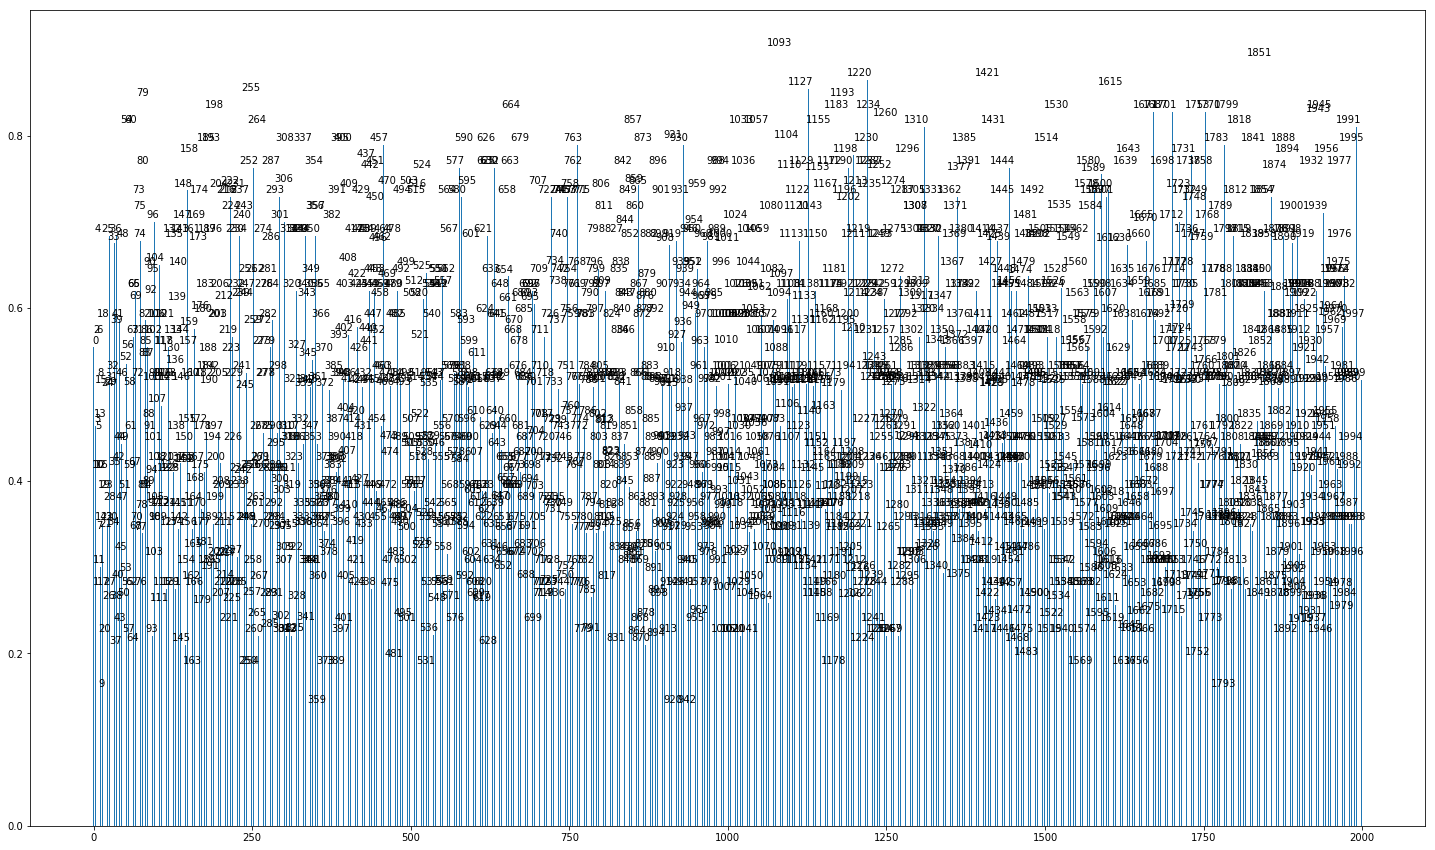

In [80]:
plt.figure(figsize=(25, 15))
all_points = np.array(range(0,2000))
plt.bar(range(0,2000),np.max(model_lda.doc_topic_,axis=1),width=0.3)
for i,label in enumerate(range(0,2000)):
    x = all_points[i]
    y = np.max(model_lda.doc_topic_,axis=1)[i]
    plt.annotate(i,xy=(x,y),xytext=(5, 2),textcoords='offset points',ha='right',va='bottom')



In [52]:
np.max(np.std(all_options,axis=0),axis=1)

array([3.33066907e-16, 4.44089210e-16, 1.22124533e-15, ...,
       1.22124533e-15, 6.10622664e-16, 5.55111512e-16])

In [47]:
(np.std(all_options,axis=0)[0,:] > 0.000001).any()

False

In [28]:
tsne2 = TSNE(perplexity=40, n_components=2, init='pca', n_iter=5000)
plot_only = 2000
lowDWeights2 = tsne2.fit_transform(np.std(all_options,axis=0))



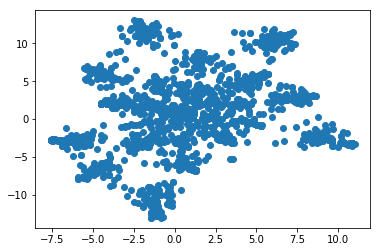

In [29]:
plt.scatter(lowDWeights2[:,0],lowDWeights2[:,1])

** Plot Convergence of LDA **

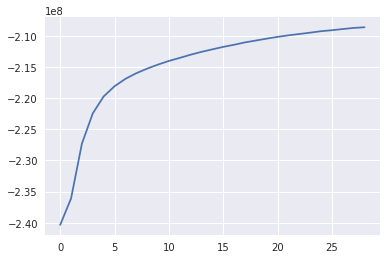

In [104]:
plt.plot(model_lda.loglikelihoods_[1:])

In [172]:
prediction_global_b5 = np.argmax(model_lda.doc_topic_,axis=1).shape

In [176]:
prediction_global_b2 = np.argmax(model_lda.doc_topic_,axis=1).shape

In [182]:
model_lda.nzw_.shape

(20, 512)

In [205]:
model_lda.ndz_

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [219]:
model_lda.ndz_[0,:]

array([2, 0, 0, 6, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [157]:
model_lda.components_[0,:].shape

(128,)

<Container object of 128 artists>

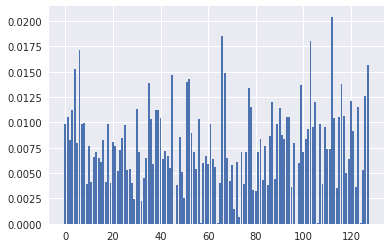

In [158]:
plt.bar(range(0,128),model_lda.components_[0,:])

<Container object of 10 artists>

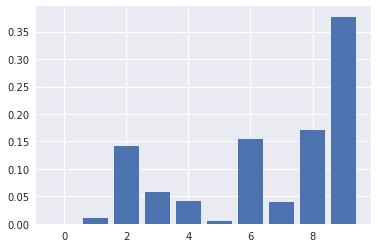

In [159]:
plt.bar(range(0,10),model_lda.doc_topic_[0,:])

In [48]:
np.sum([topic_prob*(np.exp(np.sum(np.log(model_lda.components_[i,:])))) for i,topic_prob in enumerate(model_lda.doc_topic_[4,:])])


0.0

In [38]:
plt.bar(range(0,512),model_lda.components_[0,:])

0.0

In [45]:
np.sum(np.log(model_lda.components_[0,:]))

-5120.89096793468

In [29]:
2 ** (-np.log2(val)/np.sum(processed_features_subset[0,:]))

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


inf

In [19]:
-np.log2(val)

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


inf

In [181]:
#perplexity - 2^(-log2(prob)/n)
all_perplexity_per_doc = []
for doc in range(0,2000):
    perplexity_per_doc = np.sum([topic_prob*np.prod(model_lda.components_[i,:]) for i,topic_prob in enumerate(model_lda.doc_topic_[doc,:])])
    print(perplexity_per_doc)
    all_perplexity_per_doc.append(2 ** (-np.log2(perplexity_per_doc)/np.sum(processed_features_subset[doc,:])))
    #perplexity = 2 ** (-np.log2(perplexity_per_doc)/np.sum(processed_features_subset[doc,:]))
all_perplexity_per_doc = np.asarray(all_perplexity_per_doc)

3.154621081731969e-293
1.9355675351955857e-288
3.143540899282721e-288
3.373492029290696e-288
2.1748406880018302e-288
1.3078530675159009e-288
2.3456127679332643e-288
8.314832433319354e-289
2.2567004598888977e-288
2.4812126947146744e-288
1.6049040990913002e-288
1.6751812795768037e-288
2.0561635054981393e-288
3.290813990051419e-288
3.665931911112846e-288
1.8984097507500043e-288
1.5905709020473576e-288
2.8803916678532753e-288
1.0142642151410523e-288
1.9577814609677105e-288
2.9423433811623294e-288
2.8134174974278256e-288
1.8691377874266117e-288
5.626045390075348e-289
1.2769758090552242e-288
3.87363152370286e-288
1.5871766482264715e-288
2.8594806338842665e-288
2.5410571903477528e-288
1.3399128085236282e-288
2.1168265402290116e-288
1.4774866956841603e-288
3.654399314606471e-288
1.2588687321310363e-288
1.9295999925304767e-288
2.309894632711319e-288
1.8418178089463277e-288
3.036462436652188e-288
3.301313868865471e-288
1.8318287477296123e-288
1.505053380651759e-288
2.1383642399089696e-288
2.6406

In [182]:
all_perplexity_per_doc.shape

(2000,)

(array([ 92., 478., 668., 482., 188.,  54.,  19.,  14.,   2.,   3.]),
 array([1.022563  , 1.02934272, 1.03612244, 1.04290216, 1.04968189,
        1.05646161, 1.06324133, 1.07002106, 1.07680078, 1.0835805 ,
        1.09036022]),
 <a list of 10 Patch objects>)

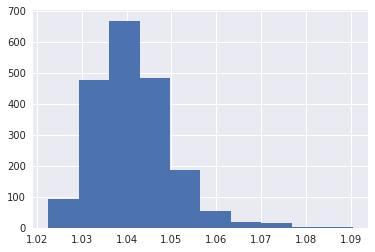

In [180]:
plt.hist(all_perplexity_per_doc)

## Visualisation of LDA wrt image labels

In [17]:
# RE-IMPLEMENT!!!
def plot_with_labels(lowDWeights, labels, filename='tsne.png'):
    assert lowDWeights.shape[0] >= len(labels), "More labels than weights"
    plt.figure(figsize=(10, 10))  #in inches

    for i,label in enumerate(labels):
        
        x, y = lowDWeights[i,:]
        if label == 'menu': #negative
            plt.scatter(x, y,c='orange')
        elif label == 'drink': #neutral
            plt.scatter(x, y,c='green')
        elif label == 'inside': #neutral
            plt.scatter(x, y,c='blue')
        elif label == 'outside': #neutral
            plt.scatter(x, y,c='yellow')
        elif label == 'food': #neutral
            plt.scatter(x, y,c='purple')
        #plt.annotate(i,
        #         xy=(x, y),
        #         xytext=(5, 2),
        #       textcoords='offset points',
        #        ha='right',
        #         va='bottom')

    #plt.savefig(filename)

In [49]:
tsne = TSNE(perplexity=40, n_components=2, init='pca', n_iter=5000)
plot_only = 2000
lowDWeights = tsne.fit_transform(model_lda.doc_topic_)


In [50]:
labels = final_labels

In [51]:
final_labels.shape

(2000,)

In [52]:
new_labels = []
for label in labels:
    if label == 'menu': #negative
        new_labels.append(0)
    elif label == 'drink': #neutral
        new_labels.append(1)
    elif label == 'inside': #neutral
        new_labels.append(2)
    elif label == 'outside': #neutral
        new_labels.append(3)
    elif label == 'food': #neutral
        new_labels.append(4)
new_labels = np.asarray(new_labels)

In [53]:
labels2 = np.argmax(model_lda.doc_topic_,axis=1)

In [54]:
collections.Counter(labels)

Counter({'drink': 61, 'food': 1251, 'inside': 498, 'menu': 6, 'outside': 184})

In [55]:
class_count = collections.Counter(labels2)

In [56]:
class_count

Counter({0: 185,
         1: 152,
         2: 339,
         3: 143,
         4: 176,
         5: 496,
         6: 72,
         7: 136,
         8: 85,
         9: 216})

In [57]:
# 4 clusters p = 40
plot_with_labels(lowDWeights, labels, str(1*100)+'.png')

NameError: name 'plot_with_labels' is not defined

In [ ]:
#cmap1 = plt.cm.get_cmap('jet', labels2)
plt.figure(figsize=(15, 10))
plt.scatter(lowDWeights[:,0],lowDWeights[:,1],c=labels2,cmap='jet')
#plt.legend(handles=[val])
plt.colorbar()
for i,label in enumerate(labels2):
    x, y = lowDWeights[i,:]
    if(i%5 == 0):
        plt.annotate(label,xy=(x,y),xytext=(5, 2),textcoords='offset points',ha='right',va='bottom')



[ 71 372 638 284 519 247 641 273 454 449 204 324 136 301 109 282 100 365
 187 216]


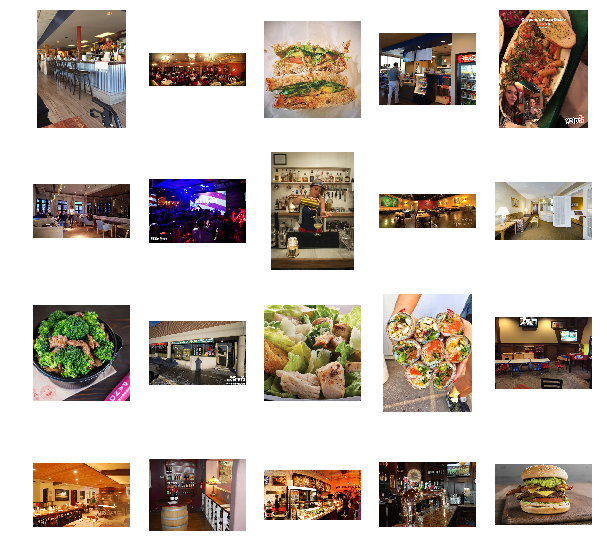

In [147]:
category = 9
cat_ind = (np.argmax(model_lda.doc_topic_,axis=1) == category)
if(class_count[category] < 20):
    num_images = class_count[category]
else:
    num_images = 20
with matplotlib.rc_context({'figure.figsize': [10,10], 'axes.titlesize': 10}):
    fig = plt.figure()
    val = np.random.choice(range(0,class_count[category]),size=(num_images),replace=False)
    print(val)
    for i,num in enumerate(range(0,num_images)):
        cat_names = names_subset[cat_ind] 
        img = PIL.Image.open(cat_names[val[i]])
        plt.subplot(4,5,i+1)
        plt.axis('off')
        plt.imshow(img)
        

In [168]:
image_num = 0
#cat 11, im = 1224

9


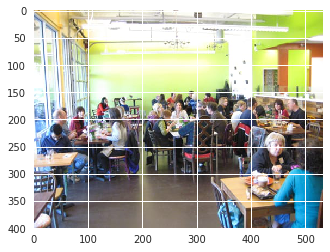

In [169]:
img = PIL.Image.open(names_subset[image_num])
plt.imshow(img)
class_val = np.argmax(model_lda.doc_topic_[image_num,:])
print(class_val)

In [88]:
print(np.argsort(model_lda.doc_topic_[image_num,:]))
model_lda.doc_topic_[image_num,:]

[ 0 17 16 12 11 18  8  9  6  4  3  2  1 19  5 10 13 14 15  7]


array([0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.1375, 0.0125, 0.1375,
       0.0125, 0.0125, 0.1375, 0.0125, 0.0125, 0.1375, 0.1375, 0.1375,
       0.0125, 0.0125, 0.0125, 0.0125])

<Container object of 20 artists>

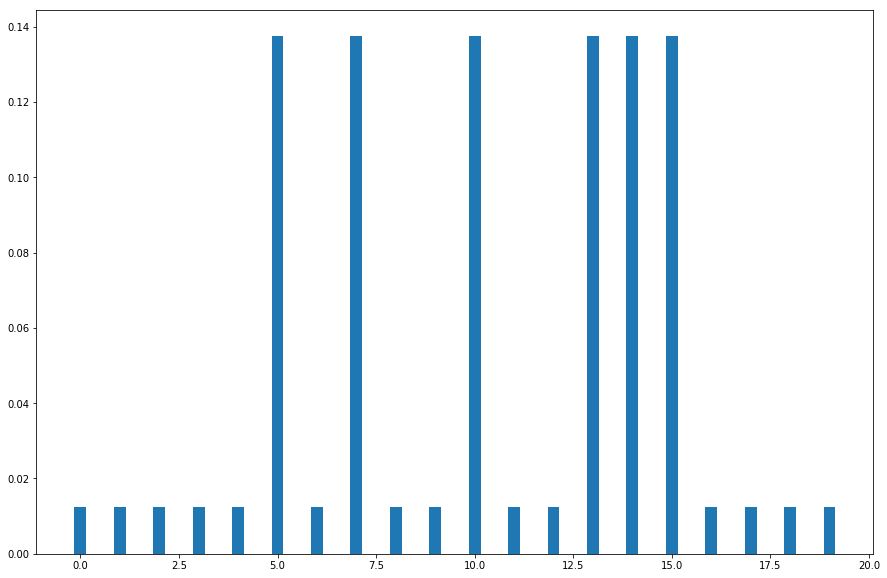

In [89]:
plt.figure(figsize=(15, 10))
#all_points = np.array(range(0,2000))
plt.bar(range(0,20),model_lda.doc_topic_[image_num,:],width=0.3)

In [129]:
category = 0
cat = (np.argmax(model_lda.doc_topic_,axis=1) == category)
indx = [i for i, x in enumerate(cat) if x]

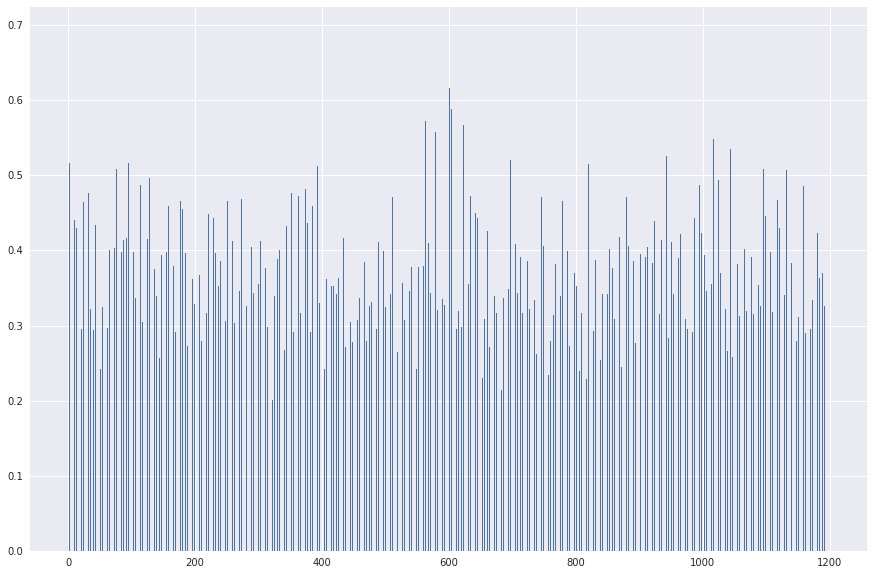

In [130]:
plt.figure(figsize=(15, 10))
#all_points = np.array(range(0,2000))
plt.bar(range(0,class_count[category]),np.max(model_lda.doc_topic_[indx,:],axis=1),width=0.3)
label_cat = indx
for i,label in enumerate(range(0,class_count[category])):

    x = i
    y = np.max(model_lda.doc_topic_[indx,:],axis=1)[i]
    #plt.annotate(label_cat[i],xy=(x,y),xytext=(5, 2),textcoords='offset points',ha='right',va='bottom')


In [37]:
import seaborn as sns

In [30]:
model_lda.doc_topic_

array([[1.92678227e-04, 1.92678227e-04, 1.92678227e-04, ...,
        4.04624277e-03, 2.11946050e-03, 1.75337187e-02],
       [9.22844175e-03, 1.51285930e-04, 1.51285930e-04, ...,
        1.51285930e-04, 1.15128593e-01, 1.51285930e-04],
       [1.18623962e-04, 9.73902728e-02, 1.18623962e-04, ...,
        1.18623962e-04, 1.30486358e-03, 1.18623962e-04],
       ...,
       [1.00100100e-04, 3.51351351e-02, 3.61361361e-02, ...,
        1.00100100e-04, 1.01201201e-01, 1.23223223e-01],
       [1.26422250e-04, 1.26422250e-04, 1.26422250e-04, ...,
        1.26422250e-04, 1.26422250e-04, 8.97597977e-03],
       [1.29701686e-04, 1.15564202e-01, 1.29701686e-04, ...,
        7.91180285e-03, 5.07133593e-02, 1.29701686e-04]])

In [87]:
topic_ordered = np.argsort(np.argmax(model_lda.doc_topic_,axis=1))

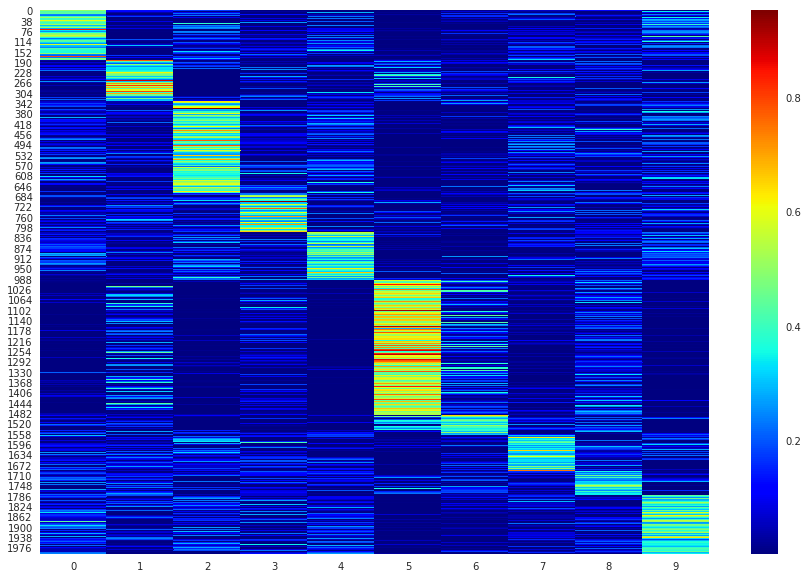

In [89]:
sns.set()
with matplotlib.rc_context({'figure.figsize': [15,10], 'axes.titlesize': 10}):
    fig = plt.figure()
    sns.heatmap(model_lda.doc_topic_ [topic_ordered,:],cmap="jet")

## rich get richer - bigger clusters get bigger over time and smaller clusters get smaller (because of way update prior) so when topic number increases, the size of the clusters are relatively similar and can therefore find drink topics are more low level similarities

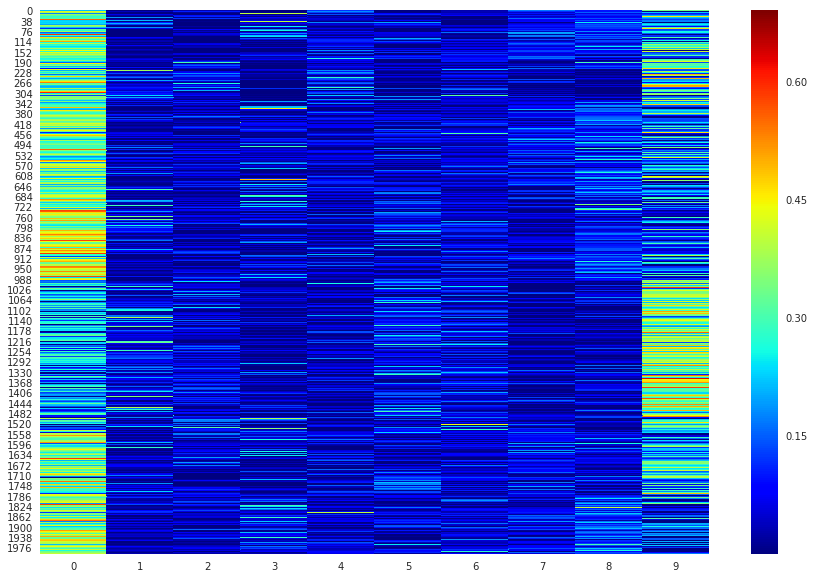

In [148]:
sns.set()
with matplotlib.rc_context({'figure.figsize': [15,10], 'axes.titlesize': 10}):
    fig = plt.figure()
    sns.heatmap(model_lda.doc_topic_ [topic_ordered,:],cmap="jet")

determining modesl given some words for a given topic 